# Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

# Business Goal

X Education want to develop a model to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

**Goal of the Case Study is :**

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.



- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Data Dictionary

- **Prospect ID:**	A unique ID with which the customer is identified.
- **Lead Number:**	A lead number assigned to each lead procured.
- **Lead Origin:**	The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
- **Lead Source:**	The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
- **Do Not Email:**	An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
- **Do Not Call:**	An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
- **Converted:**	The target variable. Indicates whether a lead has been successfully converted or not.
- **TotalVisits:**	The total number of visits made by the customer on the website.
- **Total Time Spent on Website:**	The total time spent by the customer on the website.
- **Page Views Per Visit:**	Average number of pages on the website viewed during the visits.
- **Last Activity:** Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
- **Country:**	The country of the customer.
- **Specialization:**	The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.
- **How did you hear about X Education:** The source from which the customer heard about X Education.
- **What is your current occupation:** Indicates whether the customer is a student, umemployed or employed.
- **What matters most to you in choosing this course:**	An option selected by the customer indicating what is their main motto behind doing this course.
- **Search:** Indicating whether the customer had seen the ad in any of the listed items.
- **Magazine:**	Indicating whether the customer had seen the ad in any of the listed items.	
- **Newspaper Article:**	Indicating whether the customer had seen the ad in any of the listed items.	
- **X Education Forums:** Indicating whether the customer had seen the ad in any of the listed items.	
- **Newspaper:** Indicating whether the customer had seen the ad in any of the listed items.	
- **Digital Advertisement:**	Indicating whether the customer had seen the ad in any of the listed items.	
- **Through Recommendations:**	Indicates whether the customer came in through recommendations.
- **Receive More Updates About Our Courses:** Indicates whether the customer chose to receive more updates about the courses.
- **Tags:**	Tags assigned to customers indicating the current status of the lead.
- **Lead Quality:**	Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
- **Update me on Supply Chain Content:** Indicates whether the customer wants updates on the Supply Chain Content.
- **Get updates on DM Content:** Indicates whether the customer wants updates on the DM Content.
- **Lead Profile:**	A lead level assigned to each customer based on their profile.
- **City:**	The city of the customer.
- **Asymmetrique Activity Index:** An index and score assigned to each customer based on their activity and their profile
- **Asymmetrique Profile Index:** An index and score assigned to each customer based on their activity and their profile
- **Asymmetrique Activity Score:** An index and score assigned to each customer based on their activity and their profile
- **Asymmetrique Profile Score:** An index and score assigned to each customer based on their activity and their profile
- **I agree to pay the amount through cheque:**	Indicates whether the customer has agreed to pay the amount through cheque or not.
- **a free copy of Mastering The Interview:** Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.
- **Last Notable Activity:** The last notable acitivity performed by the student.


In [736]:
# Import required libraries

# Import library to filter warning
import warnings
warnings.filterwarnings('ignore')

# Import libraries for numerical and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Import libraries for scalling the independent featurs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Import libraries for model building - dataset spliting, feature selection
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Import libraries for different metrics check for model goodness
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Set max rows and columns display options
pd.set_option("display.max_rows",10000)
pd.set_option("display.max_columns",500)

# Reset matplotlib style
%matplotlib inline

## Importing and understanding Dataset

In [737]:
# Reading the input dataset

# Dataset path: F:\Lead Scoring case study\Dataset\Leads.csv

Leads_df = pd.read_csv(r'F:\Lead Scoring case study\Dataset\Leads.csv')

# Displaying top 5 rows after reading dataset
Leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspect Dataframe

In [738]:
# Checking shape (number of rows and columns) of dataset

Leads_df.shape

(9240, 37)

- The dataset is having **`9240` rows** and **`37` columns**

In [739]:
# Checking dataset summary (null, not null, row counts, datatypes etc.)
Leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- The dataset is having **4 float columns**, **3 integer columns** and rest are **object column**
- We can see there are `some null values in the column`.

In [740]:
# Checking statistical information (min, max, mean, median, percentiles etc.) of dataset

Leads_df.describe(percentiles = [0.05, 0.25, 0.50, 0.75, 0.95, 0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
5%,582869.900000,0.000000,0.000000,0.000000,0.000000,12.000000,14.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000


- From the `above describe statistical information` we can see there are `some outliers present`, as ther are some **sudden jump from 95% to max value.**

### Null value and Duplicate Analysis

In [741]:
# Custom function to calculate and display Null value percentage for each columns

# Function Input: None
# Function Output: Returns DataFrame

def Calculate_null_percentage():
    
    # Creating dataframe for null value
    null_value = pd.DataFrame(Leads_df.isnull().sum()).reset_index()
    null_value.columns = ['Column Name','Null Value']
    
    # Creating dataframe for null percentage
    null_percent = pd.DataFrame(round(100*(Leads_df.isnull().sum()/len(Leads_df.index)),2)).reset_index()
    null_percent.columns = ['Column Name','Null Value Percentage']
    
    # Merging two dataframe to create final null dataframe
    null_df = null_value.merge(null_percent, on = 'Column Name', how = 'inner')
    
    # Sorting null dataframe to display null values in descending order
    null_df.sort_values(by = 'Null Value', ascending = False)
    null_df.reset_index(inplace = True, drop = True)
    
    # Setting Index name and value for final null dataframe
    null_df.index = null_df.index + 1
    null_df.index.name = 'Sl. No.'
    
    # Returning new dataframe from funcion
    return null_df

 #### Column wise Null Value calculation

In [742]:
# Calling custom function for checking null percentage enties in dataset columns

null_entries = Calculate_null_percentage()

# Displaying null dataFrame
null_entries

,Column Name,Null Value,Null Value Percentage
Sl. No.,,,
1,Prospect ID,0,0.00
2,Lead Number,0,0.00
3,Lead Origin,0,0.00
4,Lead Source,36,0.39
5,Do Not Email,0,0.00
6,Do Not Call,0,0.00
7,Converted,0,0.00
8,TotalVisits,137,1.48
9,Total Time Spent on Website,0,0.00


In [743]:
# Finiding column names having a level called 'Select', which needs to be handled because
# it is as good as a null value

# Initialize a empty list
sel_cols=[]

# Loop through each columns
for cols in Leads_df.columns:
    
    # Check if a column is having a level called 'Select'
    if Leads_df[Leads_df[cols]=='Select'].shape[0]!=0:
        
        # inserting columns with level 'Select' into a list
        sel_cols.append(cols)
        
# Displaying the list of columns having a level called 'Select'
sel_cols

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

#### Inference:

- There are above columns which has `'Select' as one of the category`. This is most probably because the person has `not filled that field`. We will replace this field with **NaN**

In [744]:
# Replacing the level 'Select' with NaN values

Leads_df[sel_cols]=Leads_df[sel_cols].replace('Select',np.nan)

- The above columns `Specialization','How did you hear about X Education','Lead Profile','City'` which contains 'Select' values has been replaced by NaN

In [745]:
# Calling custom function for checking null percentage enties in dataset columns

null_entries = Calculate_null_percentage()

# Displaying null dataFrame
null_entries

,Column Name,Null Value,Null Value Percentage
Sl. No.,,,
1,Prospect ID,0,0.00
2,Lead Number,0,0.00
3,Lead Origin,0,0.00
4,Lead Source,36,0.39
5,Do Not Email,0,0.00
6,Do Not Call,0,0.00
7,Converted,0,0.00
8,TotalVisits,137,1.48
9,Total Time Spent on Website,0,0.00


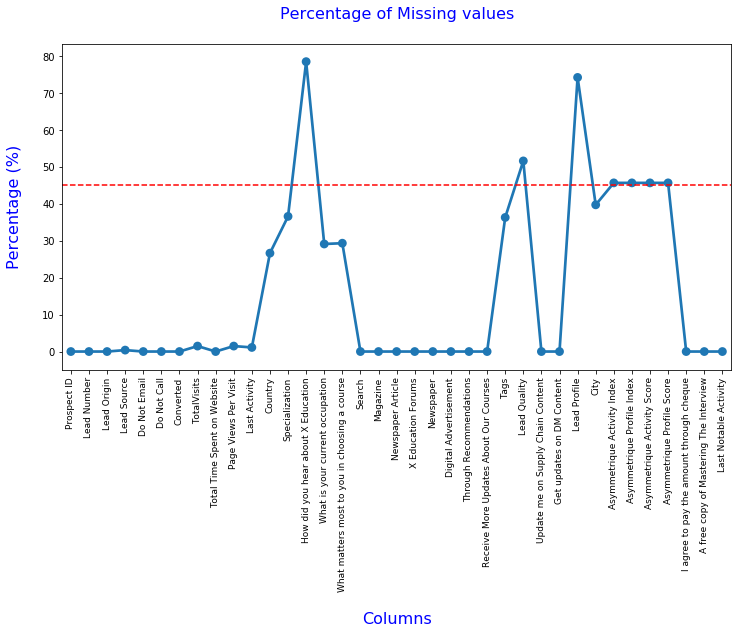

In [746]:
# Point Plot

# Setting the figure size for Point plot
plt.figure(figsize = (12,6))

# Point plot using seaborn
ax = sns.pointplot('Column Name', 'Null Value Percentage', data = null_entries)

# Setting horizontal line at 45% 
ax.axhline(45, ls = '--', color = 'red')

# Setting X- axis and Y- axix display size
plt.xticks(rotation =90,fontsize =9)

# Setting title for the plot
plt.title("Percentage of Missing values", fontsize = 16, color = 'blue', pad = 25)

# Setting axis labels
plt.ylabel("Percentage (%)",fontsize = 16, color = 'blue', labelpad = 20)
plt.xlabel("Columns",fontsize = 16, color = 'blue', labelpad = 20)

# Displaying the plot using matplotlib.pyplot show() function
plt.show()

In [747]:
# Checking Total number of rows with more than 50% null values
row_wise_50null_count = len(Leads_df[round(100*(Leads_df.isnull().sum(axis = 1)/Leads_df.shape[1]),2)>50.00])

print( 'Total number of rows with more than 50% null values are : ', row_wise_50null_count)

Total number of rows with more than 50% null values are :  0


#### Inference:

- There are `17 columns with null values`. `7 columns have more than 45% NaN (null values)` which we should drop as imputing these columns will introduce bias. 

- No rows present which have `more than 50% null values`.

### Duplicate Analysis:

In [748]:
# Duplicate analysis on 'Unique Identifier' columns like 'Prospect ID' and 'Lead Number'

print("Total number of duplicate values in Prospect ID column :" , Leads_df.duplicated(subset = 'Prospect ID').sum())
print("Total number of duplicate values in Lead Number column :" , Leads_df.duplicated(subset = 'Lead Number').sum())

Total number of duplicate values in Prospect ID column : 0
Total number of duplicate values in Lead Number column : 0


#### Inference:
    
- Both the `Prospect ID and Lead number` are unique columns and hence we don't need prediction for it.
- There are `no duplicate values present based on Prospect ID and Lead number`.

In [749]:
# Data Redundency Check - Checking spelling, case sensitive etc. redundency
Leads_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
testone                 1
Pay per Click Ads       1
youtubechannel          1
WeLearn                 1
NC_EDM                  1
blog                    1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [750]:
# Data Redundency Correction - Replacing 'google' with 'Google'

Leads_df['Lead Source'] = Leads_df['Lead Source'].str.replace('google','Google')

#### Inference:
    
- The `Lead Source` column contains one redundant value that is `'Google' and 'google'` , we have merged it into one value to 'Google'.

In [751]:
# Checking data entry in 'Lead Source' column after correcting redundency

Leads_df['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
testone                 1
Pay per Click Ads       1
youtubechannel          1
WeLearn                 1
NC_EDM                  1
blog                    1
welearnblog_Home        1
Name: Lead Source, dtype: int64

## Data Cleaning

#### Delete High Null Columns

- Clearly `Prospect ID & Lead Number` are two variables that are just indicative of the ID number of the Contacted People & can be dropped. 
- We will also remove the columns which `has more than 45% Null Values`.
- Also, some of the variables like `Lead Quality, Tags, Asymmetrique scores,Last Activity and profile etc`. are created by the sales team once they contact the potential lead. These variables will not be available for the model building as these features would not be available before the lead is being contacted and can be drop.
- Last` Notable Activity` is an intermediate column which is an update while the sales team representative is in touch with the lead, this can be drop.

In [752]:
# Custom function to drop unnecessary columns

# Input Parameters: DataFrame, List of columns to drop
# Output Parameters: Returns None

def drop_cols(df, col_list):
    
    # Drpping columns from original DataFrame
    df.drop(col_list, axis = 1, inplace = True)

In [753]:
# Calling custom function to drop unnecessary columns

# Specify list of unnecessary columns
cols_to_be_dropped = ['Prospect ID','Lead Number','How did you hear about X Education','Lead Profile',
                'Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score',
               'Asymmetrique Activity Index','Asymmetrique Profile Index','Tags','Last Notable Activity', 'Last Activity']

# calling custom function for drop columns
drop_cols(Leads_df, cols_to_be_dropped)

#### Inference:

- We have suceessfully `deleted 12 columns` where the columns had high null values or they are information which will not be available for models when it ran as they are calculated / selected by sales personnel when they contact potential leads.

In [754]:
# Checking shape (number of rows and columns) of dataset after dropping unnessary columns

Leads_df.shape

(9240, 25)

### Segregating Categorical & Numerical Values:

In [755]:
# Segregating Categorical & Numerical Values

# Creating a list of categorical columns
categorical_col = Leads_df.select_dtypes(exclude =["number"]).columns.values

# Creating a list of numerical columns
numerical_col = Leads_df.select_dtypes(include =["number"]).columns.values

# Printing the list of columns of each type
print("Categorical Features : \n {} \n\n".format(categorical_col))
print("Numerical Features : \n {} ".format(numerical_col))

Categorical Features : 
 ['Lead Origin' 'Lead Source' 'Do Not Email' 'Do Not Call' 'Country'
 'Specialization' 'What is your current occupation'
 'What matters most to you in choosing a course' 'Search' 'Magazine'
 'Newspaper Article' 'X Education Forums' 'Newspaper'
 'Digital Advertisement' 'Through Recommendations'
 'Receive More Updates About Our Courses'
 'Update me on Supply Chain Content' 'Get updates on DM Content' 'City'
 'I agree to pay the amount through cheque'
 'A free copy of Mastering The Interview'] 


Numerical Features : 
 ['Converted' 'TotalVisits' 'Total Time Spent on Website'
 'Page Views Per Visit'] 


### Categorical Columns Null Value Treatment:

In [756]:
# Create custom function for checking unique values and null values for the categorical columns

# Function Input: DataFrame, Categorical columns as list
# Function Output: Returns DataFrame

def Category_col_info(df, categorical_column):
    
    # Create new dataframe with feature names, no. of unique values, null values count etc.
    Category_info_df = pd.DataFrame(columns=["Column Name","No. of Unique values","No. of Null values","Null Percentage"])
    
    # Creating a temporary dataframe as placeholder
    Temp_df = pd.DataFrame()
    
    # Loop through each column and populate into temporary dataframe
    for value in categorical_column:
        
        # Populate column name, No. of Unique values, No. of Null values, Null Percentage column values
        Temp_df["Column Name"] = [value]
        Temp_df["No. of Unique values"] = df[value].nunique()
        Temp_df["No. of Null values"] = df[value].isna().sum()
        Temp_df["Null Percentage"] = (df[value].isnull().sum()/len(df)*100).round(2)
        
        # Appending the temporary dataframe with category information dataframe
        Category_info_df = Category_info_df.append(Temp_df)
        
    # Sorting the category information dataframe in descending order by no. of null values
    Category_info_df.sort_values(by = "No. of Null values", ascending =False, inplace=True)
    
    # Setting column name as index for category information dataframe
    Category_info_df.set_index("Column Name", inplace=True)
    
    # Returning category information dataframe
    return Category_info_df

In [757]:
# Calling custom function for checking unique values and null values for the categorical columns

Category_detail_df = Category_col_info(Leads_df, categorical_col)

# Displaying the dataframe with null values, unique values information and null percentage
Category_detail_df

,No. of Unique values,No. of Null values,Null Percentage
Column Name,,,
City,6,3669,39.71
Specialization,18,3380,36.58
What matters most to you in choosing a course,3,2709,29.32
What is your current occupation,6,2690,29.11
Country,38,2461,26.63
Lead Source,20,36,0.39
Lead Origin,5,0,0.00
Digital Advertisement,2,0,0.00
I agree to pay the amount through cheque,1,0,0.00


#### Inference:

- Some of the columns `have only 1 category`.These columns will not add any value to the model as the data is skewed and can be deleted.

In [758]:
# Checking the categorical columns with only one unique value

# Creating a list of categorical columns having only one unique value 
Cols_single_unique = Category_detail_df[Category_detail_df['No. of Unique values'] == 1].index.to_list()

# Displaying list of categorical columns having only one unique value
Cols_single_unique

['I agree to pay the amount through cheque',
 'Get updates on DM Content',
 'Update me on Supply Chain Content',
 'Receive More Updates About Our Courses',
 'Magazine']

In [759]:
# calling custom function for drop categorical columns having only one unique value
drop_cols(Leads_df, Cols_single_unique)

#### Checking the null value and column details for Categorical columns

In [760]:
# Checking shape (number of rows and columns) of dataset after dropping unnessary columns

Leads_df.shape

(9240, 20)

In [761]:
# Building categorical column list after removing columns having only one unique value

# Creating list of categorical column after dropping few columns
Categorical_cols = Leads_df.select_dtypes(exclude=['number']).columns.values

# Checking Categorical column information again 
Category_detail_df = Category_col_info(Leads_df, Categorical_cols)

# Displaying dataframe of categorical columns with null, unique values information and null percentage
Category_detail_df

,No. of Unique values,No. of Null values,Null Percentage
Column Name,,,
City,6,3669,39.71
Specialization,18,3380,36.58
What matters most to you in choosing a course,3,2709,29.32
What is your current occupation,6,2690,29.11
Country,38,2461,26.63
Lead Source,20,36,0.39
Lead Origin,5,0,0.00
Do Not Email,2,0,0.00
Do Not Call,2,0,0.00


 - Proceed with addressing individual columns for null values

In [762]:
# Custom function for plotting count plot for categorical columns

# Function Input: DataFeame , scale of axis to be displayed
# Function Output: Returns None

def count_plot_func(df,column,scale):
    
    # Setting the figure size for countplot
    plt.figure(figsize = (8,4))
    
    # Plotting count plot using seaborn
    sns.countplot(df[column], palette = 'Set2')

    # Setting title for the plot
    plt.title(column.title() + " : Count Plot", fontsize = 16, color = 'blue', pad = 25)
    
    # Setting axis display zize
    plt.xticks(rotation = 90)
    
    # Setting y scale
    if scale != ' ':
        plt.yscale(scale)
    
    # Setting axis labels
    plt.ylabel("Count",fontsize = 16, color = 'blue', labelpad = 20)
    plt.xlabel(column.title(),fontsize = 16, color = 'blue', labelpad = 20)
    
    # Displaying the plot using matplotlib.pyplot show() function
    plt.show()

In [763]:
# Checking how many rows present with each city

# Checking percentage of presence of each city
Leads_df.City.value_counts(normalize = True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [764]:
# Checking how many rows present with each city under (grouping by) each country

Leads_df.groupby(['Country','City'])[['City']].count()

City
Country              City                             
Australia            Mumbai                          6
                     Other Cities                    2
                     Thane & Outskirts               3
Bahrain              Mumbai                          1
                     Other Cities                    2
                     Other Cities of Maharashtra     1
                     Thane & Outskirts               2
                     Tier II Cities                  1
Bangladesh           Other Cities                    2
Belgium              Mumbai                          1
                     Thane & Outskirts               1
Canada               Mumbai                          3
China                Mumbai                          1
Denmark              Other Cities                    1
France               Other Cities                    2
                     Other Cities of Maharashtra     2
                     Other Metro Cities              2
Germany              Mumbai                          1
                     Other Cities                    1
                     Other Cities of Maharashtra     1
                     Thane & Outskirts               1
Ghana                Other Cities                    1
Hong Kong            Mumbai                          2
                     Other Cities                    2
                     Other Cities of Maharashtra     2
India                Mumbai                       2918
                     Other Cities                  564
                     Other Cities of Maharashtra   391
                     Other Metro Cities            345
                     Thane & Outskirts             651
                     Tier II Cities                 69
Indonesia            Other Cities of Maharashtra     1
Italy                Other Cities                    1
Kenya                Other Cities                    1
Kuwait               Mumbai                          2
                     Other Cities                    2
Liberia              Other Metro Cities              1
Malaysia             Other Cities of Maharashtra     1
Netherlands          Mumbai                          1
                     Thane & Outskirts               1
Nigeria              Other Cities                    3
                     Other Metro Cities              1
Oman                 Mumbai                          2
                     Other Cities                    2
                     Other Metro Cities              1
Philippines          Mumbai                          1
                     Other Cities                    1
Qatar                Mumbai                          3
                     Other Cities                    2
                     Other Cities of Maharashtra     1
                     Other Metro Cities              1
                     Thane & Outskirts               1
Saudi Arabia         Mumbai                          7
                     Other Cities                    9
                     Other Cities of Maharashtra     2
                     Other Metro Cities              2
                     Thane & Outskirts               1
Singapore            Mumbai                          6
                     Other Cities                    4
                     Other Cities of Maharashtra     2
                     Other Metro Cities              2
                     Thane & Outskirts               3
South Africa         Other Cities                    3
Sweden               Mumbai                          1
Switzerland          Mumbai                          1
Tanzania             Other Metro Cities              1
Uganda               Other Cities                    1
United Arab Emirates Mumbai                         17
                     Other Cities                   19
                     Other Cities of Maharashtra     3
                     Other Metro Cities              4
                     Thane & Outski

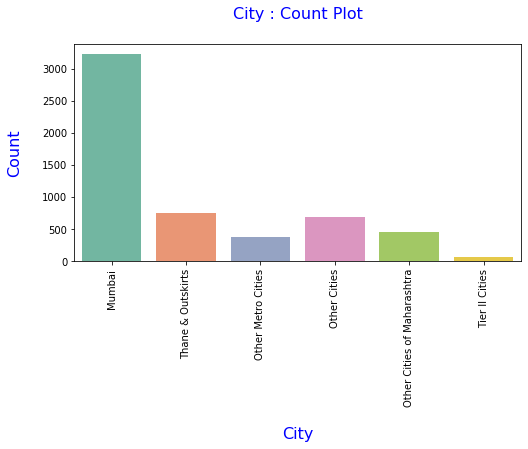

In [765]:
# Calling custom function for count plot of column 'City'

count_plot_func(Leads_df, 'City', ' ')

In [766]:
# Calling custom function for dropping 'City' column

drop_cols(Leads_df, 'City')

#### Inference:

- As there is almost `40% unknown values`, we cannot impute with mode as it is make the whole data skewed. Also, `X-Education is online teaching platform`. The city information will not be much useful as potential students can available any courses online despite their city.

- `Most of the information is also erronious` in the city column based on the country.

- We will drop the column from analysis based on above information.

In [767]:
# Checking shape (no. of rows & no. of columns) of the dataframe

Leads_df.shape

(9240, 19)

In [768]:
# Checking how many rows present with each Specialization category

# Checking percentage of presence of each Specialization category

Leads_df.Specialization.value_counts(normalize = True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Media and Advertising                 3.464164
Travel and Tourism                    3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

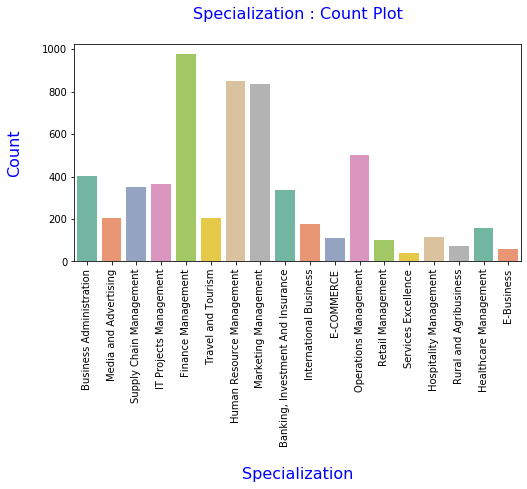

In [769]:
# Calling custom function for count plot of column 'Specialization'

count_plot_func(Leads_df, 'Specialization', ' ')

In [770]:
# Imputing null values with 'Others' category in 'Specialization' column

Leads_df['Specialization'].fillna('Others', inplace = True)

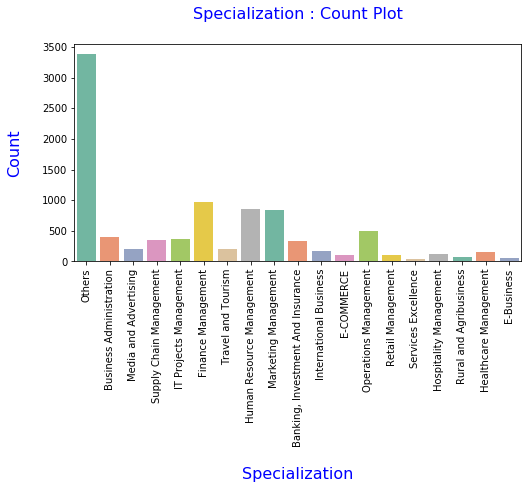

In [771]:
# Calling custom function for count plot of column 'Specialization' after imputation of null values

count_plot_func(Leads_df, 'Specialization', ' ')

#### Inference:

- It may be possible that the `lead has no specialization` or may be a student and has no work experience yet , thus he/she has not entered any value. We will create a new category called 'Others' to replace the null (NaN) values.

In [772]:
# Checking how many rows present with each values of 'What matters most to you in choosing a course' column

# Checking percentage of presence of each value in 'What matters most to you in choosing a course' column

Leads_df['What matters most to you in choosing a course'].value_counts(normalize = True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

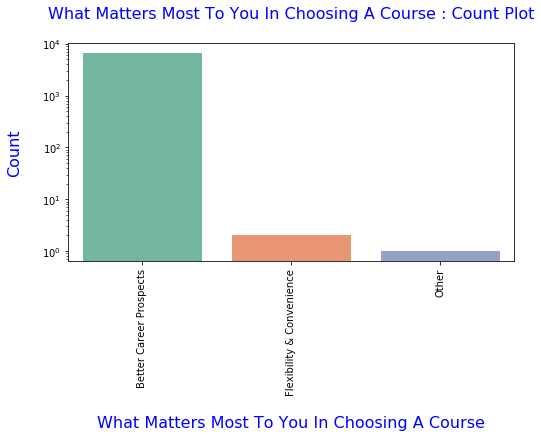

In [773]:
# Calling custom function for count plot of column 'What matters most to you in choosing a course'

count_plot_func(Leads_df, 'What matters most to you in choosing a course','log')

In [774]:
# # Calling custom function for dropping 'What matters most to you in choosing a course' column

drop_cols(Leads_df, 'What matters most to you in choosing a course')

#### Inference:
    
- As the `data is skewed`, we can delete the above column.

In [775]:
# Checking shape (no. of rows & no. of columns) of the dataframe

Leads_df.shape

(9240, 18)

In [776]:
# Checking how many rows present with each 'What is your current occupation' category

# Checking percentage of presence of each What is your current occupation values

Leads_df['What is your current occupation'].value_counts(normalize = True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

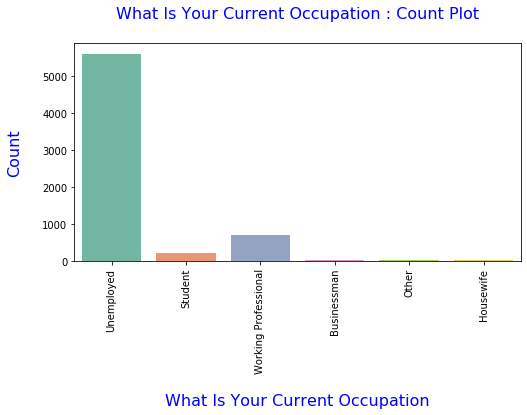

In [777]:
# Calling custom function for count plot of column 'What is your current occupation'

count_plot_func(Leads_df, 'What is your current occupation',' ')

In [778]:
# Imputing null values with 'Unknown' label

Leads_df['What is your current occupation'].fillna('Unknown', inplace = True)

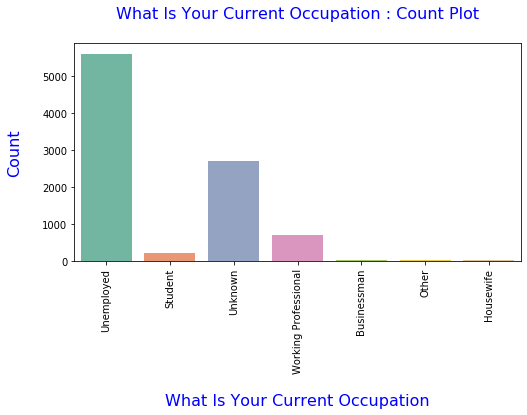

In [779]:
# Calling custom function for count plot of column 'What is your current occupation' after imputation of null values

count_plot_func(Leads_df, 'What is your current occupation',' ')

#### Inference:

- Most of the data values are "Unemployed". If we impute the data as `"Unemployed" then data will become more skewed`. Thus, we will impute the value as `"Unknown"`.

In [780]:
# Checking how many rows present with each Country

# Checking percentage of presence of each Country

Leads_df['Country'].value_counts(normalize = True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
France                   0.088509
Oman                     0.088509
unknown                  0.073757
Nigeria                  0.059006
Germany                  0.059006
South Africa             0.059006
Canada                   0.059006
Kuwait                   0.059006
Sweden                   0.044254
Netherlands              0.029503
Uganda                   0.029503
Philippines              0.029503
Bangladesh               0.029503
Asia/Pacific Region      0.029503
Belgium                  0.029503
Italy                    0.029503
Ghana                    0.029503
China                    0.029503
Liberia                  0.014751
Switzerland   

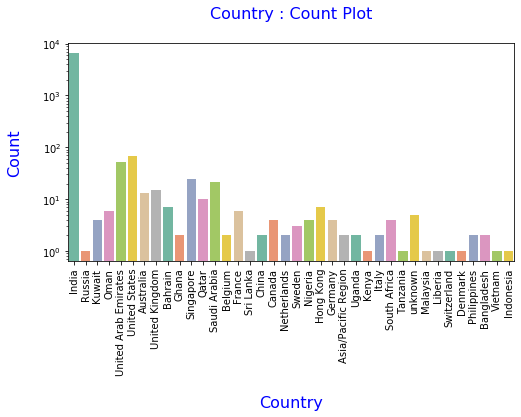

In [781]:
# Calling custom function for count plot of column 'Country'

count_plot_func(Leads_df, 'Country','log')

In [782]:
# Calling custom function for dropping 'Country' column

drop_cols(Leads_df, 'Country')

#### Inference:

- Country data is heavily skewed as `95% of the data is mapped as India`. Similar to City, Country data is not required for Model building as X-Education is online platform.We will drop the country columns too.

In [783]:
# Checking shape (no. of rows & no. of columns) of the dataframe

Leads_df.shape

(9240, 17)

In [784]:
# Checking how many rows present with each Lead Source category

# Checking percentage of presence of each Lead Source category

Leads_df['Lead Source'].value_counts(normalize = True)*100

Google               31.214689
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
Click2call            0.043459
Press_Release         0.021730
Live Chat             0.021730
Social Media          0.021730
testone               0.010865
Pay per Click Ads     0.010865
youtubechannel        0.010865
WeLearn               0.010865
NC_EDM                0.010865
blog                  0.010865
welearnblog_Home      0.010865
Name: Lead Source, dtype: float64

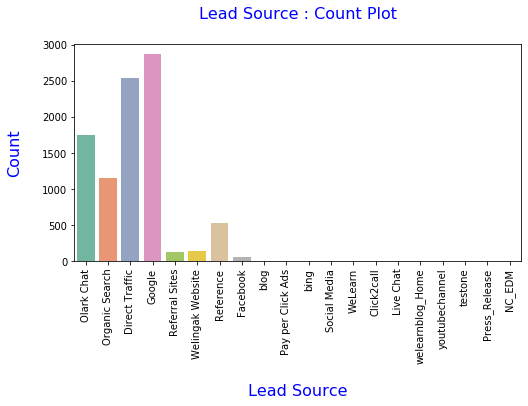

In [785]:
# Calling custom function for count plot of column 'Lead Source'

count_plot_func(Leads_df, 'Lead Source',' ')

In [786]:
# Impute null values with mode() values of 'Lead Source' column

Leads_df['Lead Source'].fillna(Leads_df['Lead Source'].mode().values[0], inplace = True)

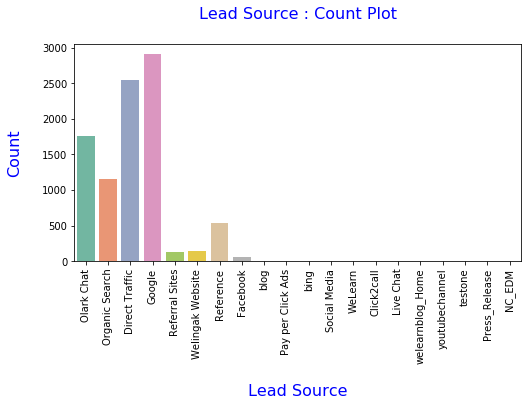

In [787]:
# Calling custom function for count plot of column 'Lead Source' after imputation of null values

count_plot_func(Leads_df, 'Lead Source',' ')

#### Inference:

- As `Google` seems to be most used `Lead Source`, we have `replaced null (NaN) values with Google`.

In [788]:
# Building categorical dataframe after removing unnecessary columns and after null value imputation

# Creating column list with existing categorical column
Categorical_cols = Leads_df.select_dtypes(exclude=['number']).columns.values

# Calling custom function for checking Categorical column unique value & null values presence 
Category_detail_df = Category_col_info(Leads_df, Categorical_cols)

# Displaying categorical information dataframe with unique value and null value information
Category_detail_df

,No. of Unique values,No. of Null values,Null Percentage
Column Name,,,
Lead Origin,5,0,0.0
Lead Source,20,0,0.0
Do Not Email,2,0,0.0
Do Not Call,2,0,0.0
Specialization,19,0,0.0
What is your current occupation,7,0,0.0
Search,2,0,0.0
Newspaper Article,2,0,0.0
X Education Forums,2,0,0.0


#### Inference:

- Finally we can see that there is `no more NaN values (null) in the categorical columns` as shown above.

### Numerical Columns Null Value Treatment

In [789]:
# Custom function for checking unique values and null values for the Numerical columns

# Function Input: DataFrame, Numerical columns as list
# Function Output: Returns DataFrame

def Numerical_col_info(df, numerical_column):
    
     # Create new dataframe with feature names, no. of null values, null values percentage etc.
    Numerical_info_df = pd.DataFrame(columns=["Column Name", "No. of Null values","Null Percentage"])
    
    # Creating a temporary dataframe as placeholder
    Temp_df = pd.DataFrame()
    
    # Loop through each column and populate into temporary dataframe
    for value in numerical_column:
        
        # Populate column name, No. of Null values, Null Percentage column values
        Temp_df["Column Name"] = [value]
        Temp_df["No. of Null values"] = df[value].isna().sum()
        Temp_df["Null Percentage"] = (df[value].isnull().sum()/len(df)*100).round(2)
        
        # Appending the temporary dataframe with numerical information dataframe
        Numerical_info_df = Numerical_info_df.append(Temp_df)
    
    # Sorting the numerical information dataframe in descending order by no. of null values
    Numerical_info_df.sort_values(by = "No. of Null values", ascending =False, inplace=True)
    
    # Setting column name as index for numerical information dataframe
    Numerical_info_df.set_index("Column Name", inplace=True)
    
    # Returning numerical information dataframe
    return Numerical_info_df

In [790]:
# Calling custom function for displaying numerical column information for null values

Numerical_detail_df = Numerical_col_info(Leads_df, numerical_col)

# Diaplaying numerical information dataframe for null value and percentage null value information
Numerical_detail_df

,No. of Null values,Null Percentage
Column Name,,
TotalVisits,137,1.48
Page Views Per Visit,137,1.48
Converted,0,0.00
Total Time Spent on Website,0,0.00


In [791]:
# Custom function for box plot and dist plot of numerical columns

# Function Input: DataFrame, Column name
# Function Output: Returns None

def plot_func(df, col):
    
    # Setting figure size
    plt.figure(figsize = (12,6))
    
    # Setting subplot coordinate
    plt.subplot(1,2,1)
    
    # Setting axis label and display parameters
    plt.xlabel(col,fontsize = 16, color = 'blue', labelpad = 20)
    
    # Plotting distribution plot using seaborn library
    sns.distplot(df[col])
    
    # Setting subplot coordinate
    plt.subplot(1,2,2)
    
    # Plotting box plot using seaborn library
    sns.boxplot(df[col])
    
    # Setting axis label and display parameters
    plt.xlabel(col,fontsize = 16, color = 'blue', labelpad = 20)
    
    # Showing the plot using matplotlib.pyplot show() function 
    plt.show()

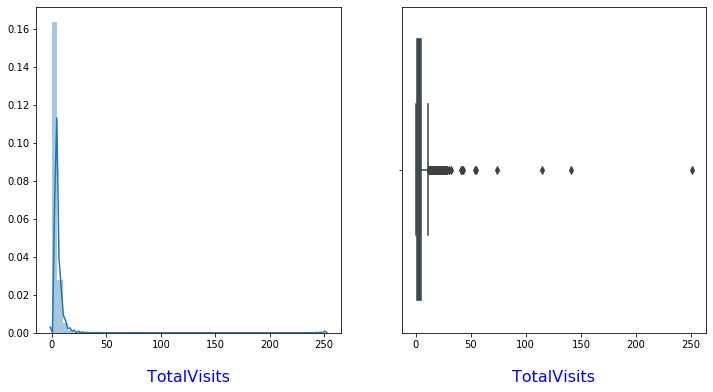

In [792]:
# Calling custom function for distribution plot and box plot of numerical column 'TotalVisits'

plot_func(Leads_df, 'TotalVisits')

In [793]:
# Imputing null values of column 'TotalVisits' with median value of 'TotalVisits' column

Leads_df['TotalVisits'].fillna(Leads_df['TotalVisits'].median(), inplace = True)

#### Inference:

- As we see there are some outliers in the data `TotalVisits`, hence, we will impute null values it with median value and not mean value.

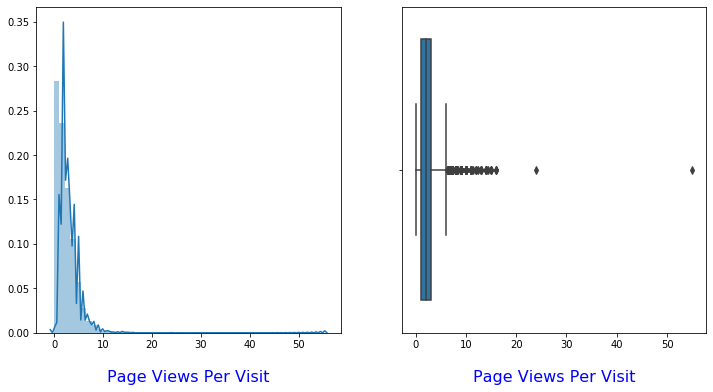

In [794]:
# Calling custom function for distribution plot and box plot of numerical column 'Page Views Per Visit'

plot_func(Leads_df, 'Page Views Per Visit')

In [795]:
# Imputing null values of column 'Page Views Per Visit' with median value of 'Page Views Per Visit' column

Leads_df['Page Views Per Visit'].fillna(Leads_df['Page Views Per Visit'].median(), inplace = True)

#### Inference:

- As we see there are some outliers in the data `Page Views Per Visit`, hence, we will impute null values it with median value and not mean value.

In [796]:
# Calling custom function for displaying numerical column information after null values imputation

Numerical_detail_df = Numerical_col_info(Leads_df, numerical_col)

# Displaying dataframe with numerical columns with null value after imputation
Numerical_detail_df

,No. of Null values,Null Percentage
Column Name,,
Converted,0,0.0
TotalVisits,0,0.0
Total Time Spent on Website,0,0.0
Page Views Per Visit,0,0.0


In [797]:
# Calling custom function for checking null percentage enties in dataset columns (both categorical 
# & numerical columns) after imputations

null_entries = Calculate_null_percentage()

# Displaying null dataFrame
null_entries

,Column Name,Null Value,Null Value Percentage
Sl. No.,,,
1,Lead Origin,0,0.0
2,Lead Source,0,0.0
3,Do Not Email,0,0.0
4,Do Not Call,0,0.0
5,Converted,0,0.0
6,TotalVisits,0,0.0
7,Total Time Spent on Website,0,0.0
8,Page Views Per Visit,0,0.0
9,Specialization,0,0.0


#### Inference:

- Finally all the null value treatment is over and from the above dataframes we can see that there `is no more NaN (null) values present in the numerical or categorical columns`.

In [798]:
# Checking shape (no. of rows & no. of columns) of the dataframe after null value treatment

Leads_df.shape


(9240, 17)

#### Inference:

- Finally after null value treatment is over, we can see we have left with **9240 rows and 17 columns** in the dataset for analysis.

### Column Name Renaming:

- Renaiming below columns for better interpretation:

    - `What is your current occupation`

    - `Through Recommendations`

    - `A free copy of Mastering The Interview`


In [799]:
# Displaying column names before renaming 

Leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview'],
      dtype='object')

In [800]:
# Renaming dataframe column names for better interpretation

Leads_df.rename(columns = {'What is your current occupation':'Occupation', 
                           'Through Recommendations':'Recommendations',
                           'A free copy of Mastering The Interview':'Free Copy'}, inplace = True)

In [801]:
# Reviewing top 5 rows of DataFrame after renaming

Leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Recommendations,Free Copy
0,API,Olark Chat,No,No,0,0.0,0,0.0,Others,Unemployed,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Others,Unemployed,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Business Administration,Student,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Media and Advertising,Unemployed,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Others,Unemployed,No,No,No,No,No,No,No


### Data Imbalance Check

---------------------------------
0    5679
1    3561
Name: Converted, dtype: int64
---------------------------------



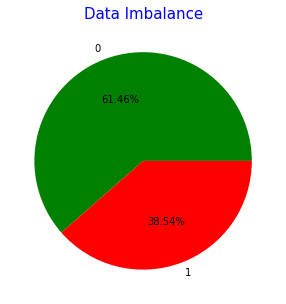

In [802]:
# Data Imbalance

   
# Checking value counts for the target variable
print("---------------------------------")
print(Leads_df['Converted'].value_counts())
print("---------------------------------")
print('')


# Using pie plot

# Taking the percentage of data points with respect to target variable
lead_conv_percentage = Leads_df['Converted'].value_counts(normalize = True)

# Formating the pie plot
plt.figure(figsize=(12,5))
plt.title("Data Imbalance",color='blue',fontsize=15)

# Ploting the pie plot

plt.pie(lead_conv_percentage,labels=lead_conv_percentage.index,autopct='%1.2f%%',colors=['green','red'])

# Showing the pie plot using matplotlib.pyplot show() function

plt.show()

#### Inference:

- In the lead conversion ration, **38.54% has converted to leads where as 61.46% did not convert** to a lead. So it seems like a almost `balanced dataset`.

## Exploratory Data Analysis (EDA)

- Univariate Analysis
- Bivariate Analysis

Most of the features in the dataset are `Categorical`. Let us begin our analysis by performing segmented `univariate and bivariate analysis together` on each categorical feature. We will view `bar plots` that will show the total count of converted and non-converted leads in every category.

### Univariate Analysis and Bivariate Analysis on Categorical columns

In [803]:
# Bivariate & Univariate Analysis

# Calling custom function for count plot and Percentage(%) converted plot

# Function Input: Column name
# Function Output: Returns None

def count_percnt_plot(col):
    
    # Setting figure size
    plt.figure(figsize = (12,4))
    
    # Setting subplot coordinate
    plt.subplot(1,2,1)
    
    # Bivariate: Plotting count plot using seaborn library with hue
    sns.countplot(x=col, 
                      data=Leads_df,
                      hue= 'Converted',
                      palette= ['r','g'],
                      order=Leads_df[col].value_counts().index)
    
    # Formatting the plot with axis labels and title
    plt.title('Bivariate: Count Plot for '+ col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'blue'},pad=15) 
    plt.xlabel(col,fontsize=15,color='blue',labelpad=12)
    plt.ylabel('Count',fontsize=15,color='blue',labelpad=12)
    plt.legend(['Not Converted','Converted'], loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    # Setting subplot coordinate 
    plt.subplot(1,2,2)
    
    # Grouping original dataframe with column value and calculating mean wrt converted column
    Lead_Org_Percnt_df = Leads_df.groupby(col)[['Converted']].mean()*100
    
    # Sorting in descending order by Converted percentage
    Lead_Org_Percnt_df.sort_values(by = 'Converted', ascending = False, inplace = True)
    
    # Barplot to dislay converted percentage under each category value of column
    sns.barplot(Lead_Org_Percnt_df.index, Lead_Org_Percnt_df['Converted'])
    
    # Formatting the plot with axis labelsand title
    plt.title('Univariate: Converted (%)', fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'blue'},pad=15) 
    plt.xlabel(col,fontsize=15,color='blue',labelpad=12)
    plt.ylabel('Percentage (%)',fontsize=15,color='blue',labelpad=6)
    plt.xticks(rotation=90, ha='right')
    
    # Showing the plot using matplotlib.pyplot show() function
    plt.show()
    
    # Display Percentage converted in tabular format
    print('')
    print('---------------------------------------------')
    Lead_Org_Percnt_df['Converted'] = round(Lead_Org_Percnt_df['Converted'],2).astype(str)+'%'
    print(Lead_Org_Percnt_df)
    print('---------------------------------------------')

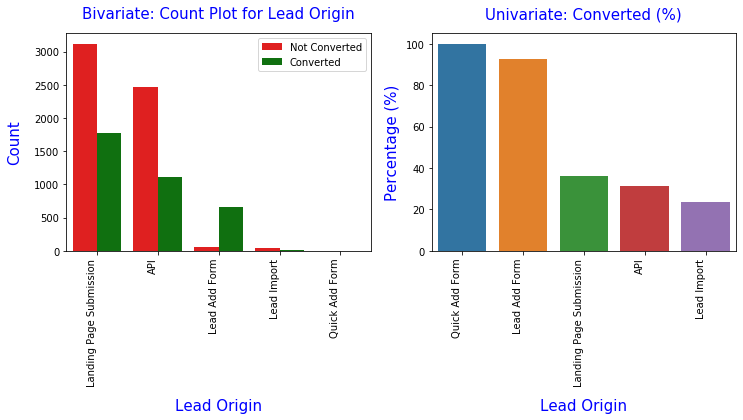


---------------------------------------------
                        Converted
Lead Origin                      
Quick Add Form             100.0%
Lead Add Form              92.48%
Landing Page Submission    36.19%
API                        31.15%
Lead Import                23.64%
---------------------------------------------


In [804]:
# Calling custom function for Bivariate & Univariate visualization wrt 'Lead Origin' & 'converted' column

count_percnt_plot('Lead Origin')

#### Inference:

- Most Leads originated from submissions on the `landing page and around 36.19% of those are converted` followed by `API, where around 31.15% are converted`.
- Even though `Lead Origins from Quick Add Form are 100% Converted`, there was just 1 lead from that category. 
- Leads from the `Lead Add Form are the next highest conversions in this category at around 92.48%`.
- Lead Import are very less in count and conversion rate is also the lowest
- To improve overall lead conversion rate, **we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.**

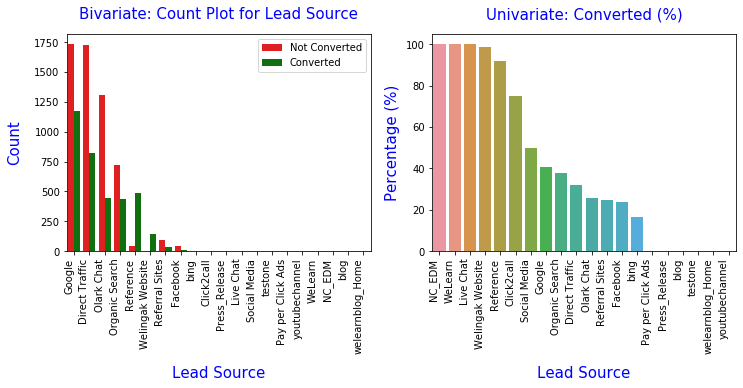


---------------------------------------------
                  Converted
Lead Source                
NC_EDM               100.0%
WeLearn              100.0%
Live Chat            100.0%
Welingak Website     98.59%
Reference            91.76%
Click2call            75.0%
Social Media          50.0%
Google               40.43%
Organic Search       37.78%
Direct Traffic       32.17%
Olark Chat           25.53%
Referral Sites        24.8%
Facebook             23.64%
bing                 16.67%
Pay per Click Ads      0.0%
Press_Release          0.0%
blog                   0.0%
testone                0.0%
welearnblog_Home       0.0%
youtubechannel         0.0%
---------------------------------------------


In [805]:
# Calling custom function for Bivariate & Univariate visualization wrt 'Lead Source' & 'converted' column

count_percnt_plot('Lead Source')

In [806]:
# Grouping few labels into 'Other Sources' as presence of these data percentage is very low

Leads_df['Lead Source'] = Leads_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other Sources')


- We have combined smaller lead sources like `'Click2call', 'Live Chat', 'NC_EDM' etc`. as `'Other Sources'`.

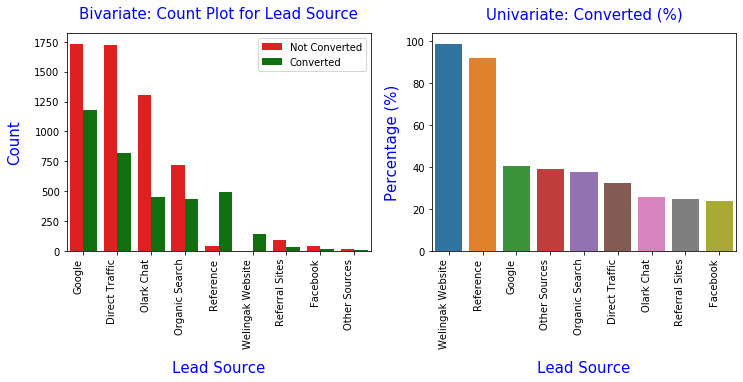


---------------------------------------------
                 Converted
Lead Source               
Welingak Website    98.59%
Reference           91.76%
Google              40.43%
Other Sources       39.13%
Organic Search      37.78%
Direct Traffic      32.17%
Olark Chat          25.53%
Referral Sites       24.8%
Facebook            23.64%
---------------------------------------------


In [807]:
# Calling custom function again for Bivariate & Univariate visualization wrt 'Lead Source' & 
# 'converted' column after label reassignment for low percentage entries

count_percnt_plot('Lead Source')

#### Inference:

- The source of the most leads was `Google, and 40.43% of the leads converted`, followed by `Direct Traffic,Organic search and Olark chat where around 32.17%, 37.78% and 25.53% converted` respectively.
- A lead that came from a `reference has over 91.76% conversion`.
- `Welingak Website has almost 98.59% lead conversion rate`. This option should be explored more to increase lead conversion
- To increase lead count, **initiatives should be taken so already exitsing members increase their referrals.**

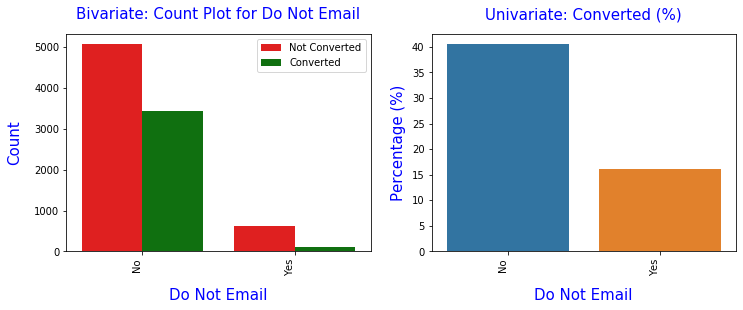


---------------------------------------------
             Converted
Do Not Email          
No              40.48%
Yes             16.08%
---------------------------------------------


In [808]:
# Calling custom function for Bivariate & Univariate visualization wrt 'Do Not Email' & 'converted' column

count_percnt_plot('Do Not Email')

#### Inference:

- Majority of the people are `ok with receiving email (~92%)`
- People who are `ok with email has conversion rate of 40.48%`
- People who have opted out of receive email has `lower rate of conversion (only 16.08%)`

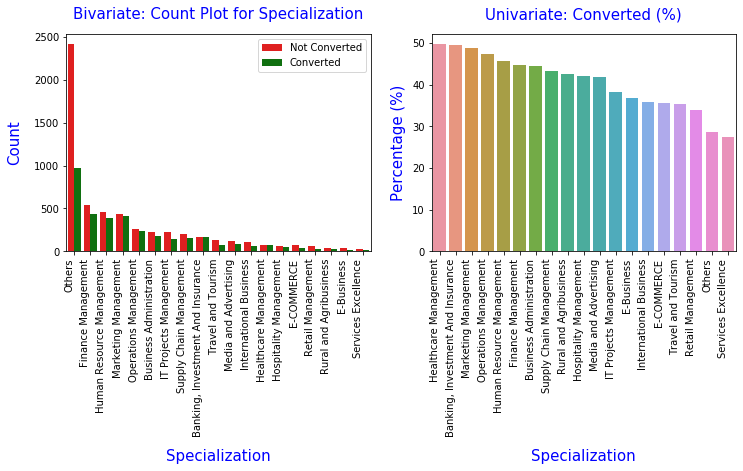


---------------------------------------------
                                  Converted
Specialization                             
Healthcare Management                49.69%
Banking, Investment And Insurance    49.41%
Marketing Management                 48.69%
Operations Management                47.32%
Human Resource Management            45.75%
Finance Management                   44.67%
Business Administration              44.42%
Supply Chain Management              43.27%
Rural and Agribusiness               42.47%
Hospitality Management               42.11%
Media and Advertising                41.87%
IT Projects Management               38.25%
E-Business                           36.84%
International Business               35.96%
E-COMMERCE                           35.71%
Travel and Tourism                   35.47%
Retail Management                     34.0%
Others                               28.67%
Services Excellence                   27.5%
-----------------------------

In [809]:
# Calling custom function for Bivariate & Univariate visualization wrt 'Specialization' & 'converted' column

count_percnt_plot('Specialization')

#### Inference:

- Most of the leads have not mentioned a `specialization and around 28.67% of those converted`
- Leads with `Healthcare Management,Operations Management,Human Resource Management,Finance management and Marketing Management` - Over 45% Converted

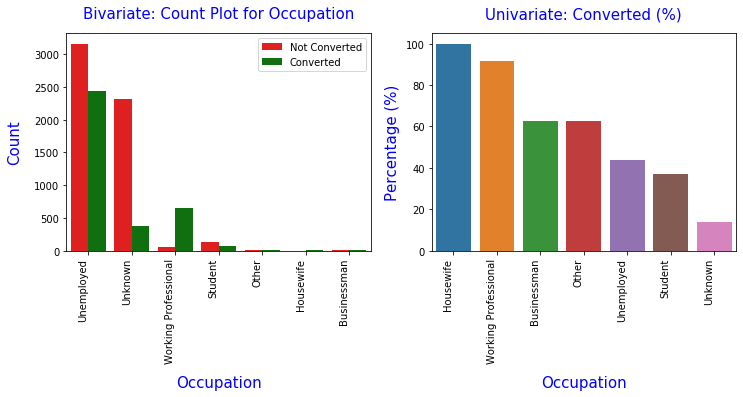


---------------------------------------------
                     Converted
Occupation                    
Housewife               100.0%
Working Professional    91.64%
Businessman              62.5%
Other                    62.5%
Unemployed              43.59%
Student                 37.14%
Unknown                 13.75%
---------------------------------------------


In [810]:
# Calling custom function for Bivariate & Univariate visualization wrt 'Occupation' & 'converted' column

count_percnt_plot('Occupation')

#### Inference:

- Though `Housewives are less in numbers, they have 100% conversion rate`
- `Working professionals, Businessmen and Other category` have high conversion rate
- Though Unemployed people have been contacted in the highest number, the conversion rate is low (43.59%)
We cannot combine `lower value categories like Unknown, Other as their` conversion rate is very different. `Combing them may provide wrong predictions.`

- The following features `Free Copy have two categories only`. We are going to evaluate the skewness of the data and decide whether to exclude them from model building.

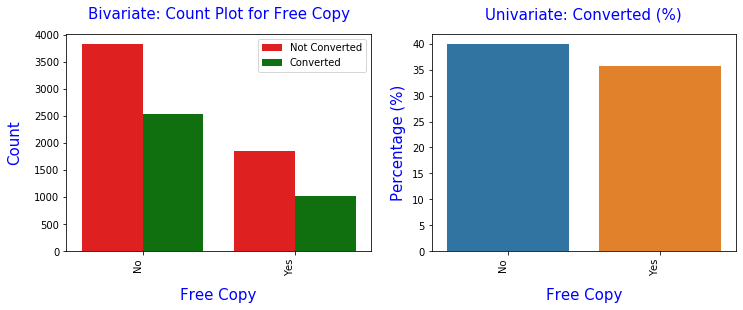


---------------------------------------------
          Converted
Free Copy          
No           39.85%
Yes          35.66%
---------------------------------------------


In [811]:
# Calling custom function for Bivariate & Univariate visualization wrt 'Free Copy' & 'converted' column

count_percnt_plot('Free Copy')

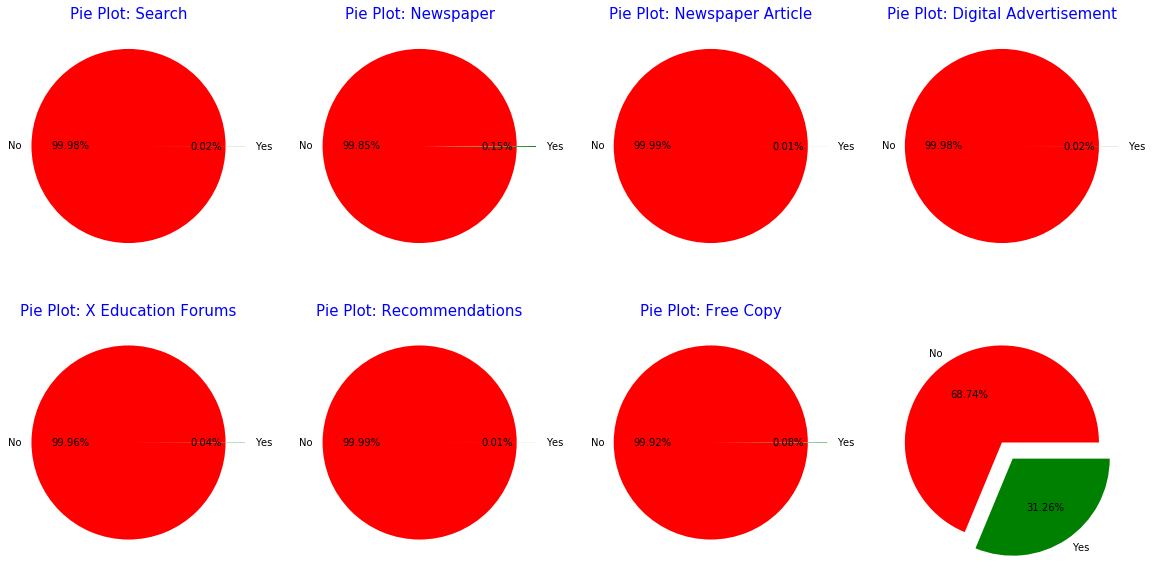

In [812]:
# Univariate: Using pie plot

# Creating column list for binary (yes/no) columns
column_lists = ['Do Not Call','Search', 'Newspaper', 'Newspaper Article', 
                'Digital Advertisement', 'X Education Forums', 'Recommendations','Free Copy']

# Formating the pie plot
plt.figure(figsize=(20,10))

# Loop through each column names
for Cols in enumerate(column_lists):
    
    # Taking the percentage of data points with respect to target variable
    lead_col_percentage = Leads_df[Cols[1]].value_counts(normalize = True)
    
    # Setting title
    plt.title("Pie Plot: " + Cols[1],color='blue',fontsize=15)
    
    # Ploting the pie plot
    plt.subplot(2,4,Cols[0]+1)
    plt.pie(lead_col_percentage,labels=lead_col_percentage.index,autopct='%1.2f%%', 
            colors=['red','green'],explode=(0,0.2))
    
# Showing the pie plot using matplotlib.pyplot show() function
    
plt.show()

In [813]:
# Dropping below Columns as presense of one category is too high

# 'Do Not Call','Search', 'Newspaper', 'Newspaper Article', 'Digital Advertisement',
# 'X Education Forums', 'Recommendations','Free Copy'


# Calling custom function fo dropping above columns
drop_cols(Leads_df,column_lists)

#### Inference:

- Search, Newspaper, Newspaper Article, Digital Advertisement,X Education Forums, Recommendation data are `very skewed and can be deleted as they will not add any value to the model`.
- Distributing `Free-Copy of Mastering Interview doesn't seem to add much value as the coenversion rate is almost same`. 
- We have dropped all above columns based on the mentioned facts.

In [814]:
# Checking shape (no. of rows & no. of columns) of the dataframe after dropping columns

Leads_df.shape

(9240, 9)

### Univariate Analysis on Numerical columns

#### Data Distribution

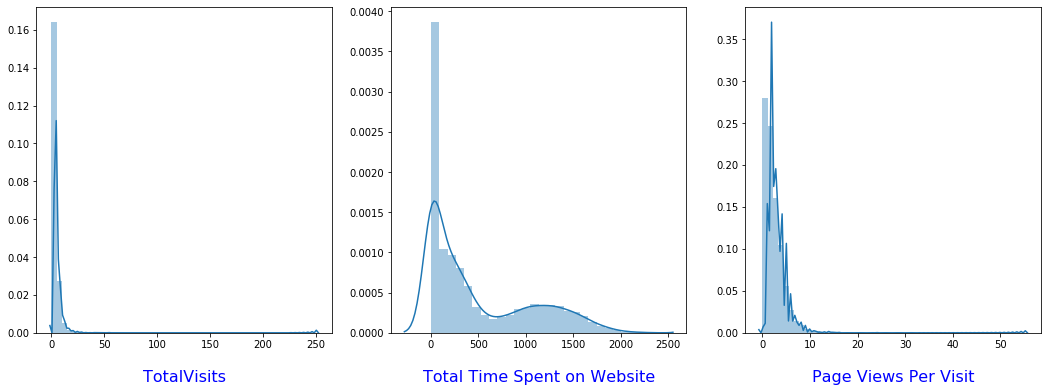

In [815]:
# Univariate Analysis - Numerical columns


# Setting figure size 
plt.figure(figsize = (18,6))

# Formatting plot display and axis for distribution plot of 'TotalVisits' numeric column
plt.subplot(1,3,1)
ax = sns.distplot(Leads_df['TotalVisits'])
ax.set_xlabel('TotalVisits',fontsize = 16, color = 'blue', labelpad = 20)

# Formatting plot display and axis for distribution plot of 'Total Time Spent on Website' numeric column
plt.subplot(1,3,2)
ax = sns.distplot(Leads_df['Total Time Spent on Website'])
ax.set_xlabel('Total Time Spent on Website',fontsize = 16, color = 'blue', labelpad = 20)

# Formatting plot display and axis for distribution plot of 'Page Views Per Visit' numeric column
plt.subplot(1,3,3)
ax = sns.distplot(Leads_df['Page Views Per Visit'])
ax.set_xlabel('Page Views Per Visit',fontsize = 16, color = 'blue', labelpad = 20)

# Showing the plot using matplotlib.pyplot show() function
plt.show()

#### Inference:
    
- `Data on Total Visits , Page Views per Visit  and Total Time Spent on Website` columns are not **normally distributed and seems to be skewed**.

### Bivariate Analysis: Categorical and Numerical Columns


In [816]:
# Bivariate Analysis - Box Plot (Categorical vs. Numerical Analysis)

# Function Input: DataFrame, Column name as list, column name for x axis for bivariate box
# Function Output: Returns DataFrame

def box_plot_func(df, colm_list, colx):
    
    # Setting figure size
    plt.figure(figsize = (15,12))
    
    # Loop through column list
    for colm in enumerate(colm_list):
        
        # setting subplot coordinate
        plt.subplot(2,2,colm[0]+1)
        
        # if colx is present then, Bivariate(Categorical vs. Numerical) box plot else univariate box 
        if colx == ' ':
            
            # Plotting and Formatting the plot
            sns.boxplot(df[colm[1]])
            plt.xlabel(colm[1],fontsize = 16, color = 'blue', labelpad = 20)
            plt.xticks(fontsize = 9)
        else:
            # Plotting and Formatting the plot
            sns.boxplot(df[colx], df[colm[1]])
            plt.xlabel('Converted',fontsize = 16, color = 'blue', labelpad = 20)
            plt.ylabel(colm[1],fontsize = 16, color = 'blue', labelpad = 20)
            plt.xticks(fontsize = 9)
            plt.yticks(fontsize = 9)
            
    # Showing the plot using matplotlib.pyplot show() function
    plt.show()

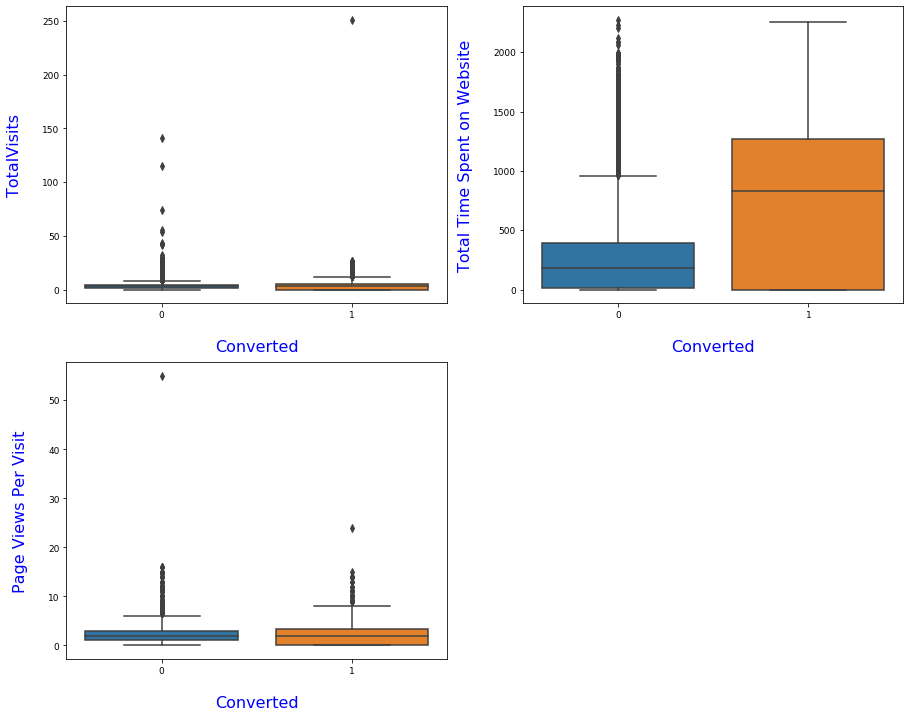

In [817]:
# Calling custom function for Bivariate (Categorical vs. Numerical) box plot

# Creating numerical column list
numeric_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Box plot with custom function
box_plot_func(Leads_df,numeric_cols, 'Converted')

#### Inference:

- `TotalVisits ,Page Views per Visit and Total Time Spent on Website` has some outliers which needs to be treated.
- `Total Time Spent on Website column has highest conversion rate` , followed by Page Views per Visit.
- `Total Visits` has lowest conversion rate.

### Bivariate Analysis: Numerical and Numerical Columns

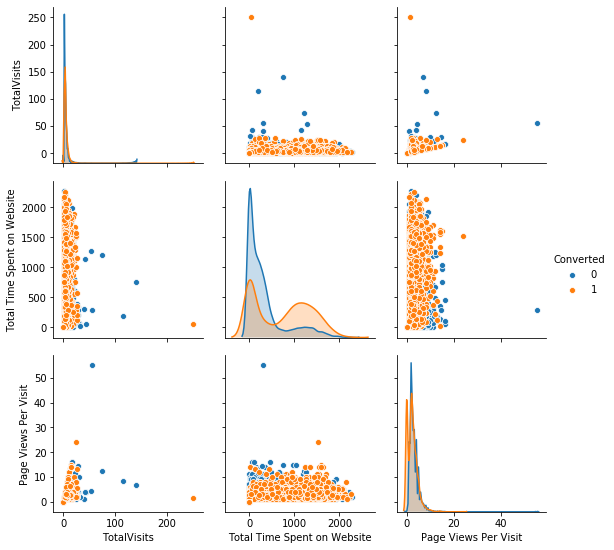

In [818]:
# Bivariate Analysis - Scatter (Numerical vs. Numerical analysis)

# Pair plot among all numerical features wrt Converted column
sns.pairplot(Leads_df[numerical_col], hue = 'Converted')  

# Showing the plot using matplotlib.pyplot show() function
plt.show()

#### Inference:

- Data is not `normally distributed`.
- There are `no linear relationship between the continuous features` as shown by the above pair plot

In [819]:
# Displaying the dataframe before Outlier Treatemet

Leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Others,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Others,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Others,Unemployed


### Data Preparation:

- Outlier treatement
- Create dummies for categorical variable
- Perform train test split
- Scalling

#### Outlier treatement 

In [820]:
# Outlier Treatment - Checking percentiles on all numerical columns

Leads_df.describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.95, 0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,17.000000,1840.610000,9.000000


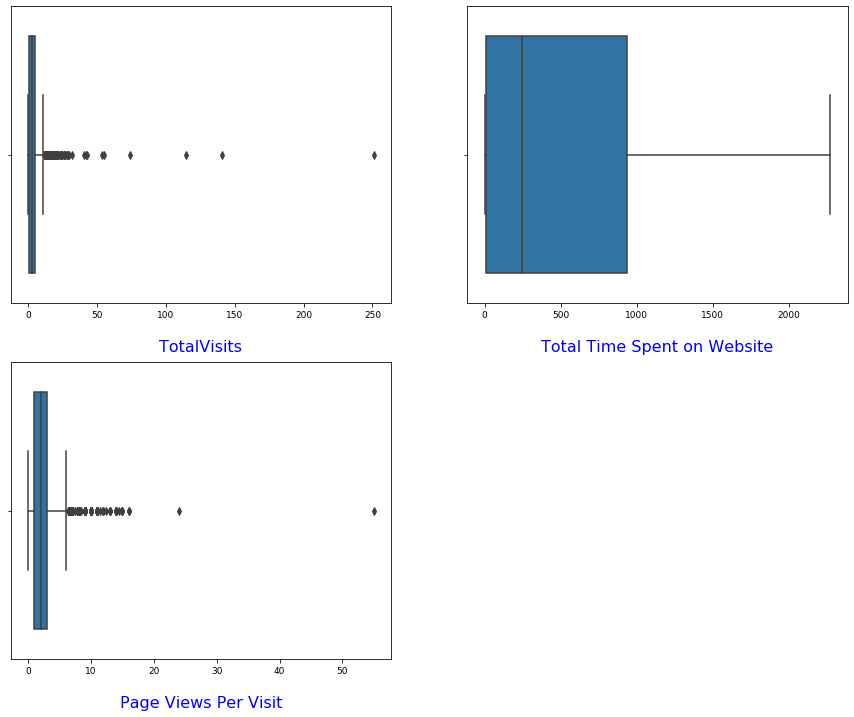

In [821]:
# Calling custom function for box plot (Univariate) for Outlier Analysis on Numerical columns

box_plot_func(Leads_df,numeric_cols, ' ')

#### Inference: 

Though outliers in `TotalVisits and Page Views Per Visit` shows valid values, this `will misclassify the outcomes and consequently create problems when making inferences` with the wrong model. Logistic Regression is influenced by outliers. So lets **cap the TotalVisits and Page Views Per Visit to their 95th percentile** due to following reasons:

- Data set is fairly high number
- 95th percentile and 99th percentile of these columns are very close and hence impact of the capping to 95th or 99th percentile will be the same.

In [822]:
# Outlier Treatment: Perform hard capping between (5% - 95%) on numerical columns

# Loop through numerical columns
for col in numeric_cols:
    
    # Taking 95% percentile value
    quant_95 = Leads_df[col].quantile(0.95)
    
    # Capping with the 95% value for all >= 95% numerical column values
    Leads_df[col][Leads_df[col] >=  quant_95] = quant_95

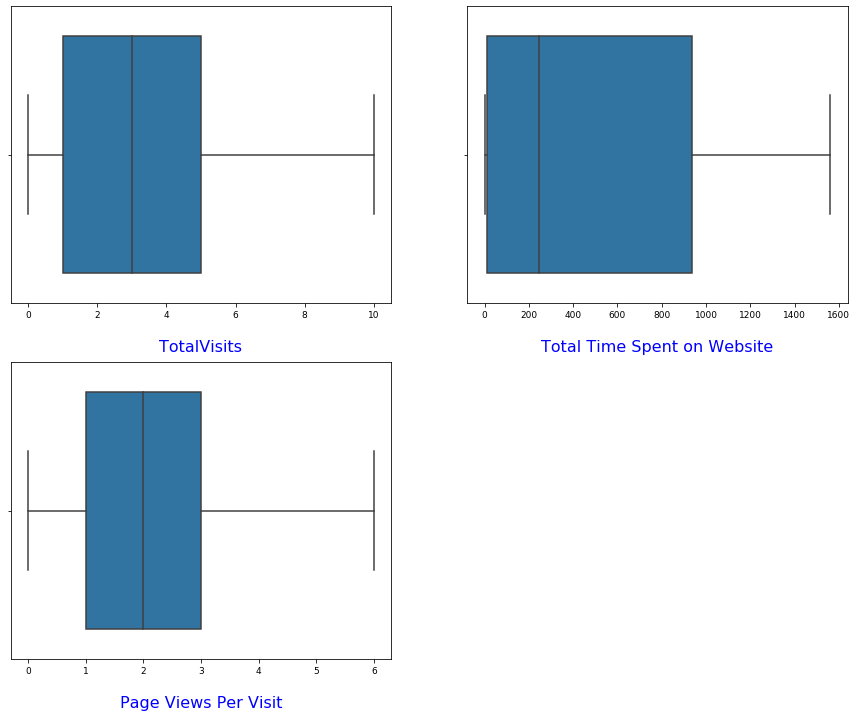

In [823]:
# Calling custom function for box plot (Univariate) after Outlier Treatment on Numerical columns

box_plot_func(Leads_df,numeric_cols, ' ')

In [824]:
# Checking Percentiles again to verify hard capping performed to set all >= 95% value with 95% value

Leads_df.describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.95, 0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.179221,479.244156,2.255105
std,0.486714,2.761219,528.819773,1.779471
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,10.000000,1562.000000,6.000000


#### Inference:

- The number of rows getting` capped are quite high`. This is also the reason that we are capping the data instead of deleting it.If we delete it we may loose some insight.

- Now from the above we can see `that there are no outliers present`.

In [825]:
# Checking DataFrame before Conversion: Categorical column to Numerical column conversion

Leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Others,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Others,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Others,Unemployed


 ### Convert Binary Categories into dummies

In [826]:
# Checking value count before binary conversion on yes/no columns

Leads_df['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [827]:
# Binary column value conversion: yes/no to 1/0 conversion 

Leads_df['Do Not Email'] = Leads_df['Do Not Email'].map({'No' : 0, 'Yes' : 1})

In [828]:
# Checking value count after binary conversion on yes/no columns

Leads_df['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

- The `Do Not Email` column has been converted to `1 and 0 values`.

### Categorical to  Dummy Variable convertion

In [829]:
# Categorical variable conversion

# Creating dummy variable list
col_list_dummy = ['Lead Origin', 'Lead Source', 'Occupation', 'Specialization']

# Conversion using pandas get_dummies function and store into new dataframe 'dummy_df'
dummy_df = pd.get_dummies(Leads_df[col_list_dummy], drop_first = True)

# Concatinating dummy_df with original dataframe
Leads_df = pd.concat([Leads_df, dummy_df], axis = 1)

# Displaying top 5 rows after dummy variable conversion
Leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Occupation,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,0,0,0.0,0,0.0,Others,Unemployed,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Others,Unemployed,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Others,Unemployed,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [830]:
# Calling custom drop column function for droping column on which (n-1) dummy columns created

drop_cols(Leads_df, col_list_dummy)

- Once we `converted all the categorical features into dummy variables` , we have **dropped the original columns**.

In [831]:
# Checking shape (no. of rows & no. of columns) of the dataframe after conversion

Leads_df.shape

(9240, 41)

### Checking the Correlation Matrix

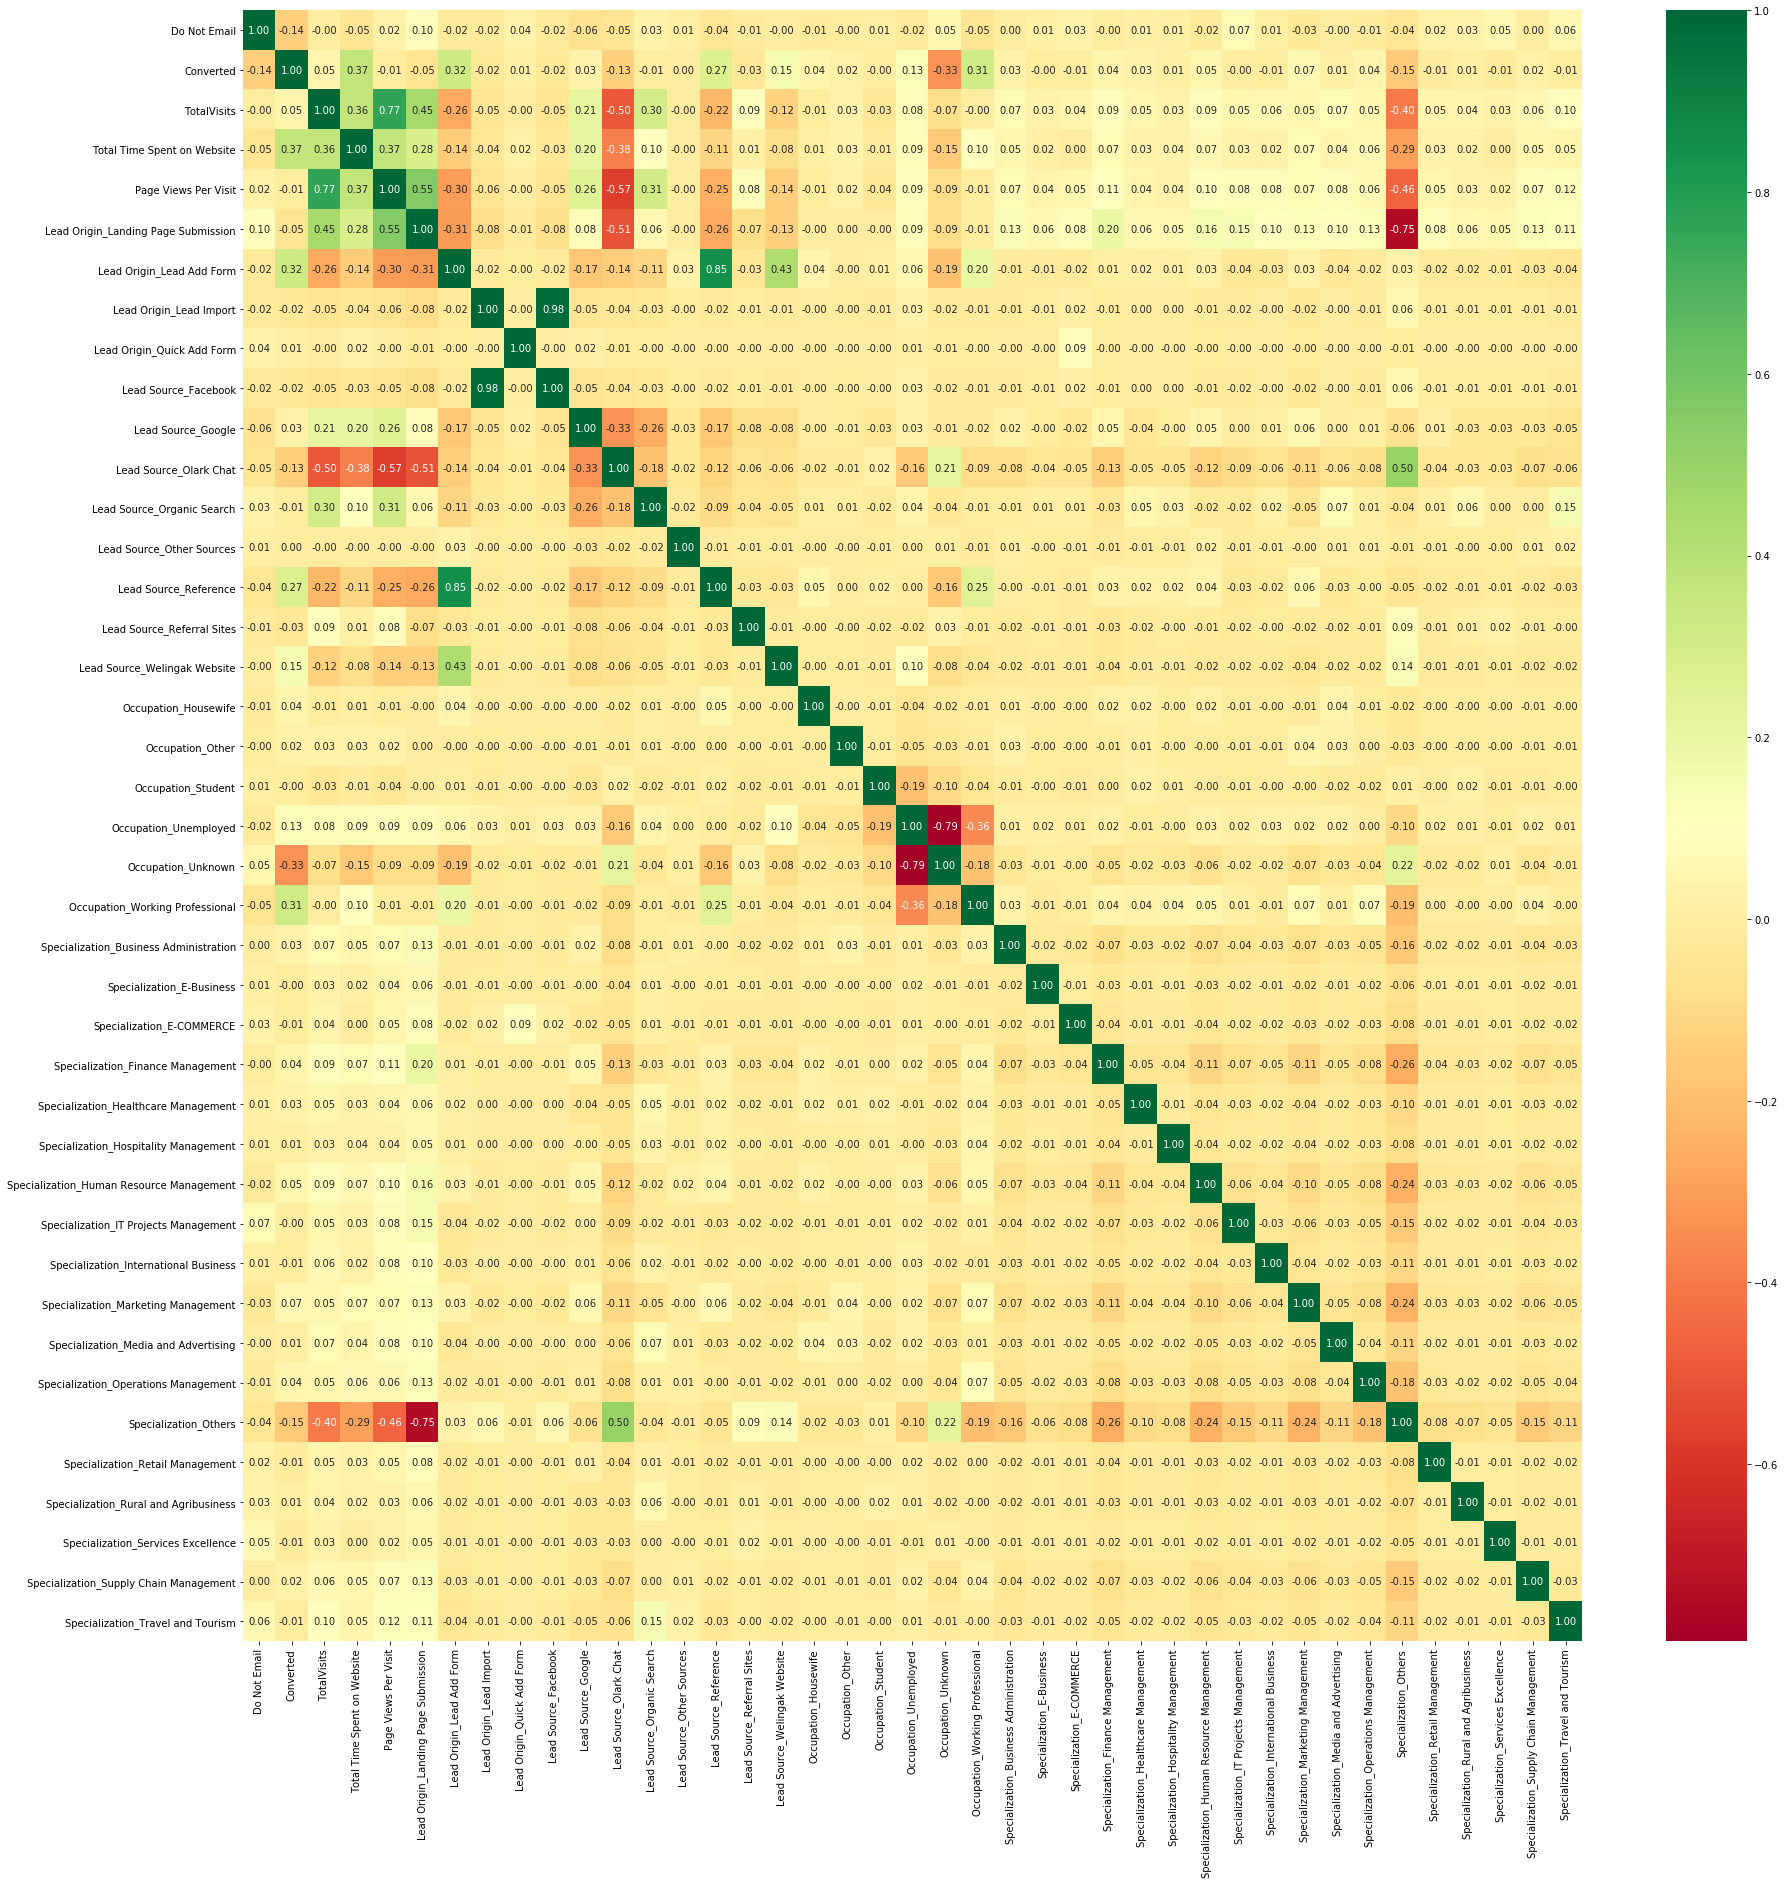

In [832]:
# Correlation check among all numerical features

# Setting figure size
plt.figure(figsize = (30,30))

# Heatmap to check correlation with correlation coefficient
sns.heatmap(Leads_df.corr(), cmap = 'RdYlGn', annot = True, fmt = '0.2f')

# Showing the plot using matplotlib.pyplot show() function
plt.show()

#### Inference:

- There are `41 columns in Heatmap which makes it difficult to interpret`. Let's review top 10 positively and negatively correlated features below.

In [833]:
# Custom function for checking correlation

# Function Input: sorting order (bool)
# Function Output: Returns DataFrame

def corr_func(df, bool_val):
    
    # Calculating correlation
    corln_lead_df = df.corr()
    corln_lead_df = corln_lead_df.where(np.triu(np.ones(corln_lead_df.shape),k = 1).astype(np.bool))
    corln_lead_df = corln_lead_df.unstack().reset_index()
    corln_lead_df.columns = ['Feature1','Feature2','Correlation']
    corln_lead_df.dropna(subset = ["Correlation"], inplace = True) 
    corln_lead_df.sort_values(by = 'Correlation', ascending = bool_val, inplace = True)
    
    # return correlation dataframe
    return corln_lead_df

In [834]:
# Checking top 10 +ve Correlation among numerical features 

top_10_pve_corr_df = corr_func(Leads_df, False)
top_10_pve_corr_df.head(10)

,Feature1,Feature2,Correlation
376,Lead Source_Facebook,Lead Origin_Lead Import,0.981709
580,Lead Source_Reference,Lead Origin_Lead Add Form,0.853237
166,Page Views Per Visit,TotalVisits,0.767585
209,Lead Origin_Landing Page Submission,Page Views Per Visit,0.553423
1446,Specialization_Others,Lead Source_Olark Chat,0.498951
207,Lead Origin_Landing Page Submission,TotalVisits,0.453501
662,Lead Source_Welingak Website,Lead Origin_Lead Add Form,0.430407
167,Page Views Per Visit,Total Time Spent on Website,0.366346
124,Total Time Spent on Website,Converted,0.365876
125,Total Time Spent on Website,TotalVisits,0.363818


In [835]:
# Checking top 10 -ve Correlation among numerical features 

top_10_nve_corr_df = corr_func(Leads_df, True)
top_10_nve_corr_df.head(10)

,Feature1,Feature2,Correlation
881,Occupation_Unknown,Occupation_Unemployed,-0.794875
1440,Specialization_Others,Lead Origin_Landing Page Submission,-0.748263
455,Lead Source_Olark Chat,Page Views Per Visit,-0.573334
456,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,-0.512950
453,Lead Source_Olark Chat,TotalVisits,-0.500094
1439,Specialization_Others,Page Views Per Visit,-0.458727
1437,Specialization_Others,TotalVisits,-0.401182
454,Lead Source_Olark Chat,Total Time Spent on Website,-0.383643
922,Occupation_Working Professional,Occupation_Unemployed,-0.356754
461,Lead Source_Olark Chat,Lead Source_Google,-0.328230


In [836]:
# Calling custom function for dropping correlated column 'Lead Source_Facebook'

drop_cols(Leads_df, 'Lead Source_Facebook')

In [837]:
# Checking top 10 +ve Correlation among numerical features agin

top_10_pve_corr_df = corr_func(Leads_df, False)
top_10_pve_corr_df.head(10)

,Feature1,Feature2,Correlation
526,Lead Source_Reference,Lead Origin_Lead Add Form,0.853237
162,Page Views Per Visit,TotalVisits,0.767585
204,Lead Origin_Landing Page Submission,Page Views Per Visit,0.553423
1370,Specialization_Others,Lead Source_Olark Chat,0.498951
202,Lead Origin_Landing Page Submission,TotalVisits,0.453501
606,Lead Source_Welingak Website,Lead Origin_Lead Add Form,0.430407
163,Page Views Per Visit,Total Time Spent on Website,0.366346
121,Total Time Spent on Website,Converted,0.365876
122,Total Time Spent on Website,TotalVisits,0.363818
241,Lead Origin_Lead Add Form,Converted,0.321702


In [838]:
# Checking top 10 -ve Correlation among numerical features again

top_10_nve_corr_df = corr_func(Leads_df, True)
top_10_nve_corr_df.head(10)

,Feature1,Feature2,Correlation
819,Occupation_Unknown,Occupation_Unemployed,-0.794875
1365,Specialization_Others,Lead Origin_Landing Page Submission,-0.748263
404,Lead Source_Olark Chat,Page Views Per Visit,-0.573334
405,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,-0.512950
402,Lead Source_Olark Chat,TotalVisits,-0.500094
1364,Specialization_Others,Page Views Per Visit,-0.458727
1362,Specialization_Others,TotalVisits,-0.401182
403,Lead Source_Olark Chat,Total Time Spent on Website,-0.383643
859,Occupation_Working Professional,Occupation_Unemployed,-0.356754
409,Lead Source_Olark Chat,Lead Source_Google,-0.328230


In [839]:
# Calling custom function for dropping correlated column 'Lead Source_Reference'

drop_cols(Leads_df,'Lead Source_Reference')

In [840]:
# Checking top 10 +ve Correlation among numerical features again

top_10_pve_corr_df = corr_func(Leads_df, False)
top_10_pve_corr_df.head(10)

,Feature1,Feature2,Correlation
158,Page Views Per Visit,TotalVisits,0.767585
199,Lead Origin_Landing Page Submission,Page Views Per Visit,0.553423
1297,Specialization_Others,Lead Source_Olark Chat,0.498951
197,Lead Origin_Landing Page Submission,TotalVisits,0.453501
552,Lead Source_Welingak Website,Lead Origin_Lead Add Form,0.430407
159,Page Views Per Visit,Total Time Spent on Website,0.366346
118,Total Time Spent on Website,Converted,0.365876
119,Total Time Spent on Website,TotalVisits,0.363818
235,Lead Origin_Lead Add Form,Converted,0.321702
781,Occupation_Working Professional,Converted,0.313837


In [841]:
# Checking top 10 -ve Correlation among numerical features again

top_10_nve_corr_df = corr_func(Leads_df, True)
top_10_nve_corr_df.head(10)

,Feature1,Feature2,Correlation
759,Occupation_Unknown,Occupation_Unemployed,-0.794875
1292,Specialization_Others,Lead Origin_Landing Page Submission,-0.748263
394,Lead Source_Olark Chat,Page Views Per Visit,-0.573334
395,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,-0.512950
392,Lead Source_Olark Chat,TotalVisits,-0.500094
1291,Specialization_Others,Page Views Per Visit,-0.458727
1289,Specialization_Others,TotalVisits,-0.401182
393,Lead Source_Olark Chat,Total Time Spent on Website,-0.383643
798,Occupation_Working Professional,Occupation_Unemployed,-0.356754
399,Lead Source_Olark Chat,Lead Source_Google,-0.328230


In [842]:
# Calling custom function for dropping correlated column 'Occupation_Unknown'

drop_cols(Leads_df,'Occupation_Unknown')

In [843]:
# Checking top 10 +ve Correlation among numerical features again

top_10_pve_corr_df = corr_func(Leads_df, False)
top_10_pve_corr_df.head(10)

,Feature1,Feature2,Correlation
154,Page Views Per Visit,TotalVisits,0.767585
194,Lead Origin_Landing Page Submission,Page Views Per Visit,0.553423
1226,Specialization_Others,Lead Source_Olark Chat,0.498951
192,Lead Origin_Landing Page Submission,TotalVisits,0.453501
538,Lead Source_Welingak Website,Lead Origin_Lead Add Form,0.430407
155,Page Views Per Visit,Total Time Spent on Website,0.366346
115,Total Time Spent on Website,Converted,0.365876
116,Total Time Spent on Website,TotalVisits,0.363818
229,Lead Origin_Lead Add Form,Converted,0.321702
723,Occupation_Working Professional,Converted,0.313837


In [844]:
# Checking top 10 -ve Correlation among numerical features again

top_10_nve_corr_df = corr_func(Leads_df, True)
top_10_nve_corr_df.head(10)

,Feature1,Feature2,Correlation
1221,Specialization_Others,Lead Origin_Landing Page Submission,-0.748263
384,Lead Source_Olark Chat,Page Views Per Visit,-0.573334
385,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,-0.512950
382,Lead Source_Olark Chat,TotalVisits,-0.500094
1220,Specialization_Others,Page Views Per Visit,-0.458727
1218,Specialization_Others,TotalVisits,-0.401182
383,Lead Source_Olark Chat,Total Time Spent on Website,-0.383643
740,Occupation_Working Professional,Occupation_Unemployed,-0.356754
389,Lead Source_Olark Chat,Lead Source_Google,-0.328230
233,Lead Origin_Lead Add Form,Lead Origin_Landing Page Submission,-0.307485


#### Inference:

- We have dropped columns `Occupation_Unknown,Lead Source_Reference and Lead Source_Facebook` as these columns has `high collinearity` with other columns (> 0.75) and will effect the VIF (variance inflation factor) due to `multicollinearity` in the features.Hence we have dropped it

In [845]:
# Checking shape (no. of rows & no. of columns) of the dataframe after dropping few correlated columns

Leads_df.shape

(9240, 38)

In [846]:
# Displaying Original DataFrame after dropping few correlated features

Leads_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Referral Sites,Lead Source_Welingak Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Train - Test Split

In [847]:
# Performing Train test split for modeling

Leads_train_df, Leads_test_df = train_test_split(Leads_df, train_size = 0.7, random_state = 100)

In [848]:
# Checking shape (no. of rows & no. of columns) of the train dataframe

Leads_train_df.shape

(6468, 38)

In [849]:
# Checking shape (no. of rows & no. of columns) of the test dataframe

Leads_test_df.shape

(2772, 38)

In [850]:
# Seperating independent (X_train) and dependent (y_train) features

y_train = Leads_train_df.pop('Converted')
X_train = Leads_train_df

In [851]:
# Printing the shape of each independent (X_train) and dependent (y_train) features

print(y_train.shape)
print(X_train.shape)

(6468,)
(6468, 37)


In [852]:
# Seperating independent (X_test) and dependent (y_test) features

y_test = Leads_test_df.pop('Converted')
X_test = Leads_test_df

In [853]:
# Printing the shape of each independent (X_test) and dependent (y_test) features

print(y_test.shape)
print(X_test.shape)

(2772,)
(2772, 37)


- We have splitted the dataset in to train and test for modelling.

### Scalling the DataFrame

In [854]:
# Perform scalling on train dataset

# Using Standard scaler preprocessing technique to standarized data columns(excluding dummy columns)
scaler = StandardScaler()

# Creating column list to be scalled
col_scale = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Fitting and transforming numerical columns and storing back into original train dataset
X_train[col_scale] = scaler.fit_transform(X_train[col_scale])

# Checking top 5 rows from train dataset
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Referral Sites,Lead Source_Welingak Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1871,0,-1.149699,-0.901052,-1.266675,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6795,0,0.299722,0.021396,-0.516439,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3516,0,0.662077,-0.700273,0.143543,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8105,0,0.662077,1.428746,1.553761,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3934,0,-1.149699,-0.901052,-1.266675,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


- **Feature Scaling**: We standardized the numeric attributes so they have a common mean of zero, we have made the data scale free.

## Model Building

- Use techniques like RFE to perform variable selection.
- Build a Logistic Regression model with good sensitivity.
- Check p-value and VIF.
- Find the optimal probability cutoff.
- Check the model performance over the test data.
- Generate the score variable.


### RFE for recursive feature elimination technique

In [855]:
# Perform Automated Feature Selection using recursive feature elimination(RFE) for logistic regression 

logreg_model = LogisticRegression()
rfe = RFE(logreg_model, 20)
rfe = rfe.fit(X_train, y_train)

In [856]:
# Checking RFE selected columns for logistic regression modeling

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 9),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 8),
 ('Lead Source_Other Sources', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Occupation_Housewife', True, 1),
 ('Occupation_Other', False, 10),
 ('Occupation_Student', True, 1),
 ('Occupation_Unemployed', True, 1),
 ('Occupation_Working Professional', True, 1),
 ('Specialization_Business Administration', False, 3),
 ('Specialization_E-Business', False, 12),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_Finance Management', False, 18),
 ('Specialization_Healthcare Management', False, 15),
 ('Specializatio

In [857]:
# Checking importent features selected by RFE

rfe_cols = list(X_train.columns[rfe.support_])
rfe_cols

['Do Not Email',
 'Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'Lead Source_Google',
 'Lead Source_Olark Chat',
 'Lead Source_Other Sources',
 'Lead Source_Referral Sites',
 'Lead Source_Welingak Website',
 'Occupation_Housewife',
 'Occupation_Student',
 'Occupation_Unemployed',
 'Occupation_Working Professional',
 'Specialization_E-COMMERCE',
 'Specialization_Hospitality Management',
 'Specialization_International Business',
 'Specialization_Others',
 'Specialization_Retail Management',
 'Specialization_Rural and Agribusiness']

In [858]:
# Checking unimportent features not selected by RFE

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Quick Add Form',
       'Lead Source_Organic Search', 'Occupation_Other',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism'],
      dtype='object')

#### Inference 

- By the RFE technique we have selected `20 features` as below:


 - 'Do Not Email'
 - 'Total Time Spent on Website'
 - 'Lead Origin_Landing Page Submission'
 - 'Lead Origin_Lead Add Form'
 - 'Lead Origin_Lead Import'
 - 'Lead Source_Google'
 - 'Lead Source_Olark Chat'
 - 'Lead Source_Other Sources'
 - 'Lead Source_Referral Sites'
 - 'Lead Source_Welingak Website'
 - 'Occupation_Housewife'
 - 'Occupation_Student'
 - 'Occupation_Unemployed'
 - 'Occupation_Working Professional'
 - 'Specialization_E-COMMERCE'
 - 'Specialization_Hospitality Management'
 - 'Specialization_International Business'
 - 'Specialization_Others'
 - 'Specialization_Retail Management'
 - 'Specialization_Rural and Agribusiness'

### Building the Logistic regression model and perform Manual Feature Reduction:

For Manual Feature Reduction, the following methods will be followed in order to reduce the features until we reach reasonable amount of `feature count and maintain Sensitivity of the modeal around 80%`

- Drop features with High P-Value
- Drop features with High VIF

In [859]:
# Custom function for logistic regression model building

# Function Input: Column List
# Function Output: Returns Logistic regression model and X_train with Beta0 coefficient

def build_logreg_model(feature_list):
    
    # Creating dataframe with RFE selected columns
    X_train_rfe = X_train[feature_list]
    
    # Add beta0 constant
    X_train_sm = sm.add_constant(X_train_rfe)
    
    # Building model with Statsmodel api GLM method
    logreg_model = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
    
    # returning model and X_train with Beta0 coefficient
    return(logreg_model, X_train_sm)

In [860]:
# Custom function for variance inflation factor (VIF) calculation

# Function Input: X_train dataframe
# Function Output: Returns DataFrame

def calculate_variance_inflation_factor(X_train_df):
    
    # Creating new dataframe for VIF diplay
    VIF_df = pd.DataFrame()
    
    # Create column with feature list
    VIF_df['Features'] = X_train_df.columns
    
    # VIF calculation
    VIF_df['VIF'] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]
    VIF_df['VIF'] = round(VIF_df['VIF'], 2)
    
    # Sorting dataframe in descending value of VIF value
    VIF_df.sort_values(by = 'VIF', ascending = False, inplace = True)
    VIF_df.reset_index(inplace = True, drop = True)
    
    # Return VIF dataframe
    return(VIF_df)

 #### Model 1:

In [861]:
# Calling custom function for logistic regression model building and checking the model summary

lr_model1, X_train_sm1 = build_logreg_model(rfe_cols)
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2836.9
Date:                Mon, 07 Dec 2020   Deviance:                       5673.9
Time:                        03:15:08   Pearson chi2:                 7.84e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2936      0.151     -8.545      0.000      -1.590      -0.997
Do Not Email                             -1.2753      0.161     -7.943      0.000      -1.590      -0.961
Total Time Spent on Website               1.0930      0.038     28.530      0.000       1.018       1.168
Lead Origin_Landing Page Submission      -0.7677      0.127     -6.068      0.000      -1.016      -0.520
Lead Origin_Lead Add Form                 3.3025      0.206     16.042      0.000       2.899       3.706
Lead Origin_Lead Import                  -0.3595      0.538     -0.668      0.504      -1.414       0.695
Lead Source_Google                        0.2517      0.079      3.183      0.001       0.097       0.407
Lead Source_Olark Chat                    1.0785      0.128      8.402      0.000       0.827       1.330
Lead Source_Other Sources                 0.3024      0.648      0.467      0.641      -0.968       1.572
Lead Source_Referral Sites               -0.2590      0.310     -0.836      0.403      -0.866       0.348
Lead Source_Welingak Website              2.5271      0.743      3.401      0.001       1.071       3.984
Occupation_Housewife                     23.4917   1.34e+04      0.002      0.999   -2.63e+04    2.63e+04
Occupation_Student                        1.0654      0.230      4.635      0.000       0.615       1.516
Occupation_Unemployed                     1.1791      0.083     14.162      0.000       1.016       1.342
Occupation_Working Professional           3.5829      0.196     18.268      0.000       3.198       3.967
Specialization_E-COMMERCE                 0.3198      0.279      1.148      0.251      -0.226       0.866
Specialization_Hospitality Management    -0.9250      0.316     -2.930      0.003      -1.544      -0.306
Specialization_International Business    -0.4017      0.252     -1.597      0.110      -0.895       0.091
Specialization_Others                    -0.9251      0.119     -7.804      0.000      -1.157      -0.693
Specialization_Retail Management         -0.3890      0.320     -1.217      0.224      -1.016       0.238
Specialization_Rural and Agribusiness     0.4845      0.377      1.285      0.199      -0.255       1.224
=========================================================================================================
"""

In [862]:
# Calling custom function for VIF calculation and display VIF dataframe

VIF_dataframe = calculate_variance_inflation_factor(X_train[rfe_cols])
VIF_dataframe

,Features,VIF
0,Occupation_Unemployed,2.75
1,Specialization_Others,2.56
2,Lead Origin_Landing Page Submission,2.45
3,Lead Source_Olark Chat,2.12
4,Lead Source_Google,1.68
5,Lead Origin_Lead Add Form,1.67
6,Occupation_Working Professional,1.33
7,Lead Source_Welingak Website,1.27
8,Total Time Spent on Website,1.27
9,Do Not Email,1.11


#### Inference:

- We will remove `'Occupation_Housewife'` feature due to high P-value of 0.999

In [863]:
# Dropping column with higher p-value as the coefficient becomes insignificant when p-value is high

rfe_cols.remove('Occupation_Housewife')

# Checking the REF column list after dropping column with high p-value
rfe_cols

['Do Not Email',
 'Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'Lead Source_Google',
 'Lead Source_Olark Chat',
 'Lead Source_Other Sources',
 'Lead Source_Referral Sites',
 'Lead Source_Welingak Website',
 'Occupation_Student',
 'Occupation_Unemployed',
 'Occupation_Working Professional',
 'Specialization_E-COMMERCE',
 'Specialization_Hospitality Management',
 'Specialization_International Business',
 'Specialization_Others',
 'Specialization_Retail Management',
 'Specialization_Rural and Agribusiness']

#### Model 2

In [864]:
# Calling custom function for logistic regression model building and checking the model summary

lr_model1, X_train_sm1 = build_logreg_model(rfe_cols)
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2845.9
Date:                Mon, 07 Dec 2020   Deviance:                       5691.8
Time:                        03:15:08   Pearson chi2:                 7.90e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2646      0.151     -8.388      0.000      -1.560      -0.969
Do Not Email                             -1.2823      0.161     -7.987      0.000      -1.597      -0.968
Total Time Spent on Website               1.0915      0.038     28.544      0.000       1.017       1.166
Lead Origin_Landing Page Submission      -0.7665      0.126     -6.065      0.000      -1.014      -0.519
Lead Origin_Lead Add Form                 3.3326      0.206     16.207      0.000       2.930       3.736
Lead Origin_Lead Import                  -0.3576      0.538     -0.665      0.506      -1.412       0.697
Lead Source_Google                        0.2538      0.079      3.215      0.001       0.099       0.408
Lead Source_Olark Chat                    1.0762      0.128      8.391      0.000       0.825       1.328
Lead Source_Other Sources                 0.2880      0.648      0.444      0.657      -0.982       1.558
Lead Source_Referral Sites               -0.2591      0.310     -0.837      0.403      -0.866       0.348
Lead Source_Welingak Website              2.5067      0.743      3.373      0.001       1.050       3.963
Occupation_Student                        1.0405      0.230      4.527      0.000       0.590       1.491
Occupation_Unemployed                     1.1527      0.083     13.966      0.000       0.991       1.314
Occupation_Working Professional           3.5538      0.196     18.148      0.000       3.170       3.938
Specialization_E-COMMERCE                 0.3114      0.278      1.119      0.263      -0.234       0.857
Specialization_Hospitality Management    -0.9348      0.316     -2.960      0.003      -1.554      -0.316
Specialization_International Business    -0.4098      0.251     -1.631      0.103      -0.902       0.083
Specialization_Others                    -0.9373      0.118     -7.916      0.000      -1.169      -0.705
Specialization_Retail Management         -0.3960      0.320     -1.239      0.215      -1.022       0.230
Specialization_Rural and Agribusiness     0.4782      0.377      1.269      0.205      -0.261       1.217
=========================================================================================================
"""

In [865]:
# Calling custom function for VIF calculation and display VIF dataframe

VIF_dataframe = calculate_variance_inflation_factor(X_train[rfe_cols])
VIF_dataframe

,Features,VIF
0,Occupation_Unemployed,2.74
1,Specialization_Others,2.56
2,Lead Origin_Landing Page Submission,2.45
3,Lead Source_Olark Chat,2.11
4,Lead Source_Google,1.68
5,Lead Origin_Lead Add Form,1.65
6,Occupation_Working Professional,1.33
7,Lead Source_Welingak Website,1.27
8,Total Time Spent on Website,1.27
9,Do Not Email,1.11


#### Inference:

- We will remove `'Lead Source_Other Sources'` feature due to high P-value of 0.657

In [866]:
# Dropping column with higher p-value as the coefficient becomes insignificant when p-value is high

rfe_cols.remove('Lead Source_Other Sources')

# Checking the REF column list after dropping column with high p-value
rfe_cols

['Do Not Email',
 'Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'Lead Source_Google',
 'Lead Source_Olark Chat',
 'Lead Source_Referral Sites',
 'Lead Source_Welingak Website',
 'Occupation_Student',
 'Occupation_Unemployed',
 'Occupation_Working Professional',
 'Specialization_E-COMMERCE',
 'Specialization_Hospitality Management',
 'Specialization_International Business',
 'Specialization_Others',
 'Specialization_Retail Management',
 'Specialization_Rural and Agribusiness']

 #### Model 3

In [867]:
# Calling custom function for logistic regression model building and checking the model summary

lr_model1, X_train_sm1 = build_logreg_model(rfe_cols)
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2846.0
Date:                Mon, 07 Dec 2020   Deviance:                       5692.0
Time:                        03:15:09   Pearson chi2:                 7.91e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2619      0.151     -8.378      0.000      -1.557      -0.967
Do Not Email                             -1.2815      0.161     -7.981      0.000      -1.596      -0.967
Total Time Spent on Website               1.0914      0.038     28.542      0.000       1.016       1.166
Lead Origin_Landing Page Submission      -0.7669      0.126     -6.070      0.000      -1.015      -0.519
Lead Origin_Lead Add Form                 3.3354      0.206     16.228      0.000       2.933       3.738
Lead Origin_Lead Import                  -0.3591      0.538     -0.668      0.504      -1.413       0.695
Lead Source_Google                        0.2522      0.079      3.199      0.001       0.098       0.407
Lead Source_Olark Chat                    1.0745      0.128      8.383      0.000       0.823       1.326
Lead Source_Referral Sites               -0.2606      0.310     -0.842      0.400      -0.867       0.346
Lead Source_Welingak Website              2.5023      0.743      3.367      0.001       1.046       3.959
Occupation_Student                        1.0392      0.230      4.522      0.000       0.589       1.490
Occupation_Unemployed                     1.1520      0.083     13.960      0.000       0.990       1.314
Occupation_Working Professional           3.5522      0.196     18.143      0.000       3.168       3.936
Specialization_E-COMMERCE                 0.3101      0.278      1.114      0.265      -0.235       0.855
Specialization_Hospitality Management    -0.9361      0.316     -2.965      0.003      -1.555      -0.317
Specialization_International Business    -0.4108      0.251     -1.635      0.102      -0.903       0.082
Specialization_Others                    -0.9380      0.118     -7.925      0.000      -1.170      -0.706
Specialization_Retail Management         -0.3969      0.320     -1.242      0.214      -1.023       0.229
Specialization_Rural and Agribusiness     0.4770      0.377      1.265      0.206      -0.262       1.216
=========================================================================================================
"""

In [868]:
# Calling custom function for VIF calculation and display VIF dataframe

VIF_dataframe = calculate_variance_inflation_factor(X_train[rfe_cols])
VIF_dataframe

,Features,VIF
0,Occupation_Unemployed,2.74
1,Specialization_Others,2.56
2,Lead Origin_Landing Page Submission,2.44
3,Lead Source_Olark Chat,2.11
4,Lead Source_Google,1.67
5,Lead Origin_Lead Add Form,1.65
6,Occupation_Working Professional,1.33
7,Lead Source_Welingak Website,1.27
8,Total Time Spent on Website,1.27
9,Do Not Email,1.11


#### Inference:

- We will remove `'Lead Origin_Lead Import'` feature due to high P-value of 0.504

In [869]:
# Dropping column with higher p-value as the coefficient becomes insignificant when p-value is high

rfe_cols.remove('Lead Origin_Lead Import')

# Checking the REF column list after dropping column with high p-value
rfe_cols

['Do Not Email',
 'Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Google',
 'Lead Source_Olark Chat',
 'Lead Source_Referral Sites',
 'Lead Source_Welingak Website',
 'Occupation_Student',
 'Occupation_Unemployed',
 'Occupation_Working Professional',
 'Specialization_E-COMMERCE',
 'Specialization_Hospitality Management',
 'Specialization_International Business',
 'Specialization_Others',
 'Specialization_Retail Management',
 'Specialization_Rural and Agribusiness']

#### Model 4

In [870]:
# Calling custom function for logistic regression model building and checking the model summary

lr_model1, X_train_sm1 = build_logreg_model(rfe_cols)
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2846.2
Date:                Mon, 07 Dec 2020   Deviance:                       5692.5
Time:                        03:15:09   Pearson chi2:                 7.90e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2752      0.149     -8.539      0.000      -1.568      -0.983
Do Not Email                             -1.2802      0.161     -7.972      0.000      -1.595      -0.965
Total Time Spent on Website               1.0926      0.038     28.599      0.000       1.018       1.167
Lead Origin_Landing Page Submission      -0.7560      0.125     -6.035      0.000      -1.001      -0.510
Lead Origin_Lead Add Form                 3.3481      0.205     16.357      0.000       2.947       3.749
Lead Source_Google                        0.2577      0.078      3.285      0.001       0.104       0.411
Lead Source_Olark Chat                    1.0870      0.127      8.565      0.000       0.838       1.336
Lead Source_Referral Sites               -0.2514      0.309     -0.813      0.416      -0.858       0.355
Lead Source_Welingak Website              2.5018      0.743      3.367      0.001       1.045       3.958
Occupation_Student                        1.0401      0.230      4.525      0.000       0.590       1.491
Occupation_Unemployed                     1.1514      0.083     13.952      0.000       0.990       1.313
Occupation_Working Professional           3.5511      0.196     18.141      0.000       3.167       3.935
Specialization_E-COMMERCE                 0.3121      0.278      1.122      0.262      -0.233       0.857
Specialization_Hospitality Management    -0.9385      0.315     -2.975      0.003      -1.557      -0.320
Specialization_International Business    -0.4100      0.251     -1.631      0.103      -0.903       0.083
Specialization_Others                    -0.9355      0.118     -7.913      0.000      -1.167      -0.704
Specialization_Retail Management         -0.3970      0.320     -1.242      0.214      -1.023       0.229
Specialization_Rural and Agribusiness     0.4786      0.377      1.270      0.204      -0.260       1.217
=========================================================================================================
"""

In [871]:
# Calling custom function for VIF calculation and display VIF dataframe

VIF_dataframe = calculate_variance_inflation_factor(X_train[rfe_cols])
VIF_dataframe

,Features,VIF
0,Occupation_Unemployed,2.72
1,Specialization_Others,2.53
2,Lead Origin_Landing Page Submission,2.44
3,Lead Source_Olark Chat,2.09
4,Lead Source_Google,1.67
5,Lead Origin_Lead Add Form,1.64
6,Occupation_Working Professional,1.32
7,Lead Source_Welingak Website,1.27
8,Total Time Spent on Website,1.26
9,Do Not Email,1.11


#### Inference:

- We will remove `'Lead Source_Referral Sites'` feature due to high P-value of 0.416

In [872]:
# Dropping column with higher p-value as the coefficient becomes insignificant when p-value is high

rfe_cols.remove('Lead Source_Referral Sites')

# Checking the REF column list after dropping column with high p-value
rfe_cols

['Do Not Email',
 'Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Google',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Occupation_Student',
 'Occupation_Unemployed',
 'Occupation_Working Professional',
 'Specialization_E-COMMERCE',
 'Specialization_Hospitality Management',
 'Specialization_International Business',
 'Specialization_Others',
 'Specialization_Retail Management',
 'Specialization_Rural and Agribusiness']

#### Model 5

In [873]:
# Calling custom function for logistic regression model building and checking the model summary

lr_model1, X_train_sm1 = build_logreg_model(rfe_cols)
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2846.6
Date:                Mon, 07 Dec 2020   Deviance:                       5693.1
Time:                        03:15:10   Pearson chi2:                 7.90e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2928      0.148     -8.747      0.000      -1.582      -1.003
Do Not Email                             -1.2793      0.161     -7.966      0.000      -1.594      -0.965
Total Time Spent on Website               1.0925      0.038     28.596      0.000       1.018       1.167
Lead Origin_Landing Page Submission      -0.7438      0.124     -5.982      0.000      -0.987      -0.500
Lead Origin_Lead Add Form                 3.3648      0.204     16.518      0.000       2.966       3.764
Lead Source_Google                        0.2679      0.077      3.459      0.001       0.116       0.420
Lead Source_Olark Chat                    1.1055      0.125      8.848      0.000       0.861       1.350
Lead Source_Welingak Website              2.5036      0.743      3.369      0.001       1.047       3.960
Occupation_Student                        1.0431      0.230      4.539      0.000       0.593       1.494
Occupation_Unemployed                     1.1517      0.083     13.958      0.000       0.990       1.313
Occupation_Working Professional           3.5501      0.196     18.132      0.000       3.166       3.934
Specialization_E-COMMERCE                 0.3155      0.278      1.134      0.257      -0.230       0.861
Specialization_Hospitality Management    -0.9365      0.315     -2.969      0.003      -1.555      -0.318
Specialization_International Business    -0.4101      0.251     -1.631      0.103      -0.903       0.083
Specialization_Others                    -0.9371      0.118     -7.930      0.000      -1.169      -0.705
Specialization_Retail Management         -0.3962      0.320     -1.240      0.215      -1.023       0.230
Specialization_Rural and Agribusiness     0.4750      0.376      1.263      0.207      -0.262       1.212
=========================================================================================================
"""

In [874]:
# Calling custom function for VIF calculation and display VIF dataframe

VIF_dataframe = calculate_variance_inflation_factor(X_train[rfe_cols])
VIF_dataframe

,Features,VIF
0,Occupation_Unemployed,2.71
1,Lead Origin_Landing Page Submission,2.44
2,Specialization_Others,2.43
3,Lead Source_Olark Chat,2.04
4,Lead Origin_Lead Add Form,1.64
5,Lead Source_Google,1.64
6,Occupation_Working Professional,1.32
7,Lead Source_Welingak Website,1.27
8,Total Time Spent on Website,1.26
9,Do Not Email,1.11


#### Inference:

- We will remove `'Specialization_E-COMMERCE'` feature due to high P-value of 0.257

In [875]:
# Dropping column with higher p-value as the coefficient becomes insignificant when p-value is high

rfe_cols.remove('Specialization_E-COMMERCE')

# Checking the REF column list after dropping column with high p-value
rfe_cols

['Do Not Email',
 'Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Google',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Occupation_Student',
 'Occupation_Unemployed',
 'Occupation_Working Professional',
 'Specialization_Hospitality Management',
 'Specialization_International Business',
 'Specialization_Others',
 'Specialization_Retail Management',
 'Specialization_Rural and Agribusiness']

#### Model 6

In [876]:
# Calling custom function for logistic regression model building and checking the model summary

lr_model1, X_train_sm1 = build_logreg_model(rfe_cols)
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2847.2
Date:                Mon, 07 Dec 2020   Deviance:                       5694.4
Time:                        03:15:10   Pearson chi2:                 7.91e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2836      0.148     -8.702      0.000      -1.573      -0.994
Do Not Email                             -1.2758      0.160     -7.955      0.000      -1.590      -0.962
Total Time Spent on Website               1.0908      0.038     28.590      0.000       1.016       1.166
Lead Origin_Landing Page Submission      -0.7427      0.124     -5.977      0.000      -0.986      -0.499
Lead Origin_Lead Add Form                 3.3584      0.204     16.497      0.000       2.959       3.757
Lead Source_Google                        0.2638      0.077      3.411      0.001       0.112       0.415
Lead Source_Olark Chat                    1.1009      0.125      8.819      0.000       0.856       1.346
Lead Source_Welingak Website              2.5045      0.743      3.370      0.001       1.048       3.961
Occupation_Student                        1.0389      0.230      4.522      0.000       0.589       1.489
Occupation_Unemployed                     1.1511      0.082     13.953      0.000       0.989       1.313
Occupation_Working Professional           3.5505      0.196     18.127      0.000       3.167       3.934
Specialization_Hospitality Management    -0.9431      0.315     -2.992      0.003      -1.561      -0.325
Specialization_International Business    -0.4172      0.251     -1.661      0.097      -0.910       0.075
Specialization_Others                    -0.9427      0.118     -7.987      0.000      -1.174      -0.711
Specialization_Retail Management         -0.4031      0.319     -1.262      0.207      -1.029       0.223
Specialization_Rural and Agribusiness     0.4668      0.376      1.242      0.214      -0.270       1.203
=========================================================================================================
"""

In [877]:
# Calling custom function for VIF calculation and display VIF dataframe

VIF_dataframe = calculate_variance_inflation_factor(X_train[rfe_cols])
VIF_dataframe

,Features,VIF
0,Occupation_Unemployed,2.71
1,Specialization_Others,2.43
2,Lead Origin_Landing Page Submission,2.42
3,Lead Source_Olark Chat,2.04
4,Lead Origin_Lead Add Form,1.64
5,Lead Source_Google,1.64
6,Occupation_Working Professional,1.32
7,Lead Source_Welingak Website,1.27
8,Total Time Spent on Website,1.26
9,Do Not Email,1.11


#### Inference:

- We will remove `'Specialization_Rural and Agribusiness'` feature due to high P-value of 0.214

In [878]:
# Dropping column with higher p-value as the coefficient becomes insignificant when p-value is high

rfe_cols.remove('Specialization_Rural and Agribusiness')

# Checking the REF column list after dropping column with high p-value
rfe_cols

['Do Not Email',
 'Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Google',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Occupation_Student',
 'Occupation_Unemployed',
 'Occupation_Working Professional',
 'Specialization_Hospitality Management',
 'Specialization_International Business',
 'Specialization_Others',
 'Specialization_Retail Management']

#### Model 7

In [879]:
# Calling custom function for logistic regression model building and checking the model summary

lr_model1, X_train_sm1 = build_logreg_model(rfe_cols)
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2848.0
Date:                Mon, 07 Dec 2020   Deviance:                       5695.9
Time:                        03:15:10   Pearson chi2:                 7.92e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2760      0.147     -8.662      0.000      -1.565      -0.987
Do Not Email                             -1.2729      0.160     -7.939      0.000      -1.587      -0.959
Total Time Spent on Website               1.0904      0.038     28.590      0.000       1.016       1.165
Lead Origin_Landing Page Submission      -0.7443      0.124     -5.993      0.000      -0.988      -0.501
Lead Origin_Lead Add Form                 3.3555      0.204     16.486      0.000       2.957       3.754
Lead Source_Google                        0.2606      0.077      3.372      0.001       0.109       0.412
Lead Source_Olark Chat                    1.0996      0.125      8.811      0.000       0.855       1.344
Lead Source_Welingak Website              2.5045      0.743      3.371      0.001       1.048       3.961
Occupation_Student                        1.0547      0.229      4.605      0.000       0.606       1.504
Occupation_Unemployed                     1.1523      0.082     13.970      0.000       0.991       1.314
Occupation_Working Professional           3.5496      0.196     18.127      0.000       3.166       3.933
Specialization_Hospitality Management    -0.9492      0.315     -3.012      0.003      -1.567      -0.332
Specialization_International Business    -0.4230      0.251     -1.684      0.092      -0.915       0.069
Specialization_Others                    -0.9498      0.118     -8.059      0.000      -1.181      -0.719
Specialization_Retail Management         -0.4091      0.319     -1.281      0.200      -1.035       0.217
=========================================================================================================
"""

In [880]:
# Calling custom function for VIF calculation and display VIF dataframe

VIF_dataframe = calculate_variance_inflation_factor(X_train[rfe_cols])
VIF_dataframe

,Features,VIF
0,Occupation_Unemployed,2.71
1,Specialization_Others,2.43
2,Lead Origin_Landing Page Submission,2.41
3,Lead Source_Olark Chat,2.04
4,Lead Origin_Lead Add Form,1.64
5,Lead Source_Google,1.64
6,Occupation_Working Professional,1.32
7,Lead Source_Welingak Website,1.27
8,Total Time Spent on Website,1.26
9,Do Not Email,1.11


#### Inference:

- We will remove `'Specialization_Retail Management'` feature due to high P-value of 0.200

In [881]:
# Dropping column with higher p-value as the coefficient becomes insignificant when p-value is high

rfe_cols.remove('Specialization_Retail Management')

# Checking the REF column list after dropping column with high p-value
rfe_cols

['Do Not Email',
 'Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Google',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Occupation_Student',
 'Occupation_Unemployed',
 'Occupation_Working Professional',
 'Specialization_Hospitality Management',
 'Specialization_International Business',
 'Specialization_Others']

#### Model 8

In [882]:
# Calling custom function for logistic regression model building and checking the model summary

lr_model1, X_train_sm1 = build_logreg_model(rfe_cols)
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2848.8
Date:                Mon, 07 Dec 2020   Deviance:                       5697.6
Time:                        03:15:11   Pearson chi2:                 7.93e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2785      0.147     -8.679      0.000      -1.567      -0.990
Do Not Email                             -1.2759      0.160     -7.959      0.000      -1.590      -0.962
Total Time Spent on Website               1.0892      0.038     28.583      0.000       1.015       1.164
Lead Origin_Landing Page Submission      -0.7478      0.124     -6.022      0.000      -0.991      -0.504
Lead Origin_Lead Add Form                 3.3540      0.204     16.480      0.000       2.955       3.753
Lead Source_Google                        0.2594      0.077      3.358      0.001       0.108       0.411
Lead Source_Olark Chat                    1.0965      0.125      8.790      0.000       0.852       1.341
Lead Source_Welingak Website              2.5042      0.743      3.370      0.001       1.048       3.961
Occupation_Student                        1.0493      0.229      4.583      0.000       0.601       1.498
Occupation_Unemployed                     1.1516      0.082     13.960      0.000       0.990       1.313
Occupation_Working Professional           3.5467      0.196     18.115      0.000       3.163       3.930
Specialization_Hospitality Management    -0.9413      0.315     -2.988      0.003      -1.559      -0.324
Specialization_International Business    -0.4156      0.251     -1.655      0.098      -0.908       0.077
Specialization_Others                    -0.9449      0.118     -8.021      0.000      -1.176      -0.714
=========================================================================================================
"""

In [883]:
# Calling custom function for VIF calculation and display VIF dataframe

VIF_dataframe = calculate_variance_inflation_factor(X_train[rfe_cols])
VIF_dataframe

,Features,VIF
0,Occupation_Unemployed,2.71
1,Specialization_Others,2.43
2,Lead Origin_Landing Page Submission,2.40
3,Lead Source_Olark Chat,2.04
4,Lead Origin_Lead Add Form,1.64
5,Lead Source_Google,1.64
6,Occupation_Working Professional,1.32
7,Lead Source_Welingak Website,1.27
8,Total Time Spent on Website,1.26
9,Do Not Email,1.11


#### Inference:

- We will remove `'Specialization_International Business'` feature due to high P-value of 0.098

In [884]:
# Dropping column with higher p-value as the coefficient becomes insignificant when p-value is high

rfe_cols.remove('Specialization_International Business')

# Checking the REF column list after dropping column with high p-value
rfe_cols

['Do Not Email',
 'Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Google',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Occupation_Student',
 'Occupation_Unemployed',
 'Occupation_Working Professional',
 'Specialization_Hospitality Management',
 'Specialization_Others']

#### Model 9

In [885]:
# Calling custom function for logistic regression model building and checking the model summary

lr_model1, X_train_sm1 = build_logreg_model(rfe_cols)
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2850.2
Date:                Mon, 07 Dec 2020   Deviance:                       5700.4
Time:                        03:15:11   Pearson chi2:                 7.91e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2912      0.147     -8.778      0.000      -1.579      -1.003
Do Not Email                             -1.2755      0.160     -7.948      0.000      -1.590      -0.961
Total Time Spent on Website               1.0901      0.038     28.609      0.000       1.015       1.165
Lead Origin_Landing Page Submission      -0.7466      0.124     -6.015      0.000      -0.990      -0.503
Lead Origin_Lead Add Form                 3.3560      0.203     16.496      0.000       2.957       3.755
Lead Source_Google                        0.2569      0.077      3.327      0.001       0.106       0.408
Lead Source_Olark Chat                    1.0966      0.125      8.794      0.000       0.852       1.341
Lead Source_Welingak Website              2.5025      0.743      3.368      0.001       1.046       3.959
Occupation_Student                        1.0501      0.229      4.588      0.000       0.601       1.499
Occupation_Unemployed                     1.1512      0.082     13.957      0.000       0.990       1.313
Occupation_Working Professional           3.5509      0.196     18.140      0.000       3.167       3.935
Specialization_Hospitality Management    -0.9297      0.315     -2.951      0.003      -1.547      -0.312
Specialization_Others                    -0.9312      0.117     -7.928      0.000      -1.161      -0.701
=========================================================================================================
"""

In [886]:
# Calling custom function for VIF calculation and display VIF dataframe

VIF_dataframe = calculate_variance_inflation_factor(X_train[rfe_cols])
VIF_dataframe

,Features,VIF
0,Occupation_Unemployed,2.71
1,Specialization_Others,2.42
2,Lead Origin_Landing Page Submission,2.39
3,Lead Source_Olark Chat,2.04
4,Lead Origin_Lead Add Form,1.64
5,Lead Source_Google,1.64
6,Occupation_Working Professional,1.32
7,Lead Source_Welingak Website,1.27
8,Total Time Spent on Website,1.26
9,Do Not Email,1.11


#### Inference:

- All the features now has **VIF less than 5** and **P-value less than 0.05**.Hence we will now proceed forward with predeiction on train set with 12 features.

### Model Evalution : Train Dataset

#### Predicted Probability on Train dataset

In [887]:
# Predicting y_train with the build model

# Calculate y_train_pred
y_train_pred = lr_model1.predict(X_train_sm1)

# Converting predicted values in 1-D array format
y_train_pred = y_train_pred.values.reshape(-1)

# Display predicted values in array format
y_train_pred[:10]


array([0.49359593, 0.14252758, 0.32344439, 0.71662807, 0.2775081 ,
       0.97422637, 0.15534708, 0.99521563, 0.17919223, 0.80668877])

In [888]:
# Created new dataframe with target column 'Converted', 'Converted Probability', i.e., y_train_pred

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_Prob':y_train_pred})
y_train_pred_final.reset_index(inplace=True,drop=True)

# Add column 'Prospect_Id' as an unique identifier
y_train_pred_final['Prospect_Id'] = y_train.index

# Display top 5 rows of new dataframe y_train_pred_final
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_Id
0,0,0.493596,1871
1,0,0.142528,6795
2,0,0.323444,3516
3,0,0.716628,8105
4,0,0.277508,3934


### ROC Curve:

In [889]:
# Custom function for drawing AUC-ROC Curve

# Function Input: Y_actual and Converted Probability
# Function Output: Returns None

def draw_roc( actual, probs ):
    
    # Calculating True posutive rate, false posytive rate and thresholds  
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    
    # Calculating area under ROC Curve
    auc_score = metrics.roc_auc_score( actual, probs )
    
    # Setting figure size
    plt.figure(figsize=(6, 6))
    
    # Plotting AUC Curve
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    
    # Formatting the ACU-ROC Curve plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]',fontsize = 16, color = 'blue', labelpad = 20)
    plt.ylabel('True Positive Rate',fontsize = 16, color = 'blue', labelpad = 20)
    plt.title('Receiver operating characteristic Curve',fontsize = 16, color = 'blue', pad = 25)
    plt.legend(loc="lower right")
    
    # Showing the plot using matplotlib.pyplot show() function
    plt.show()
        
    # Returning None
    return None

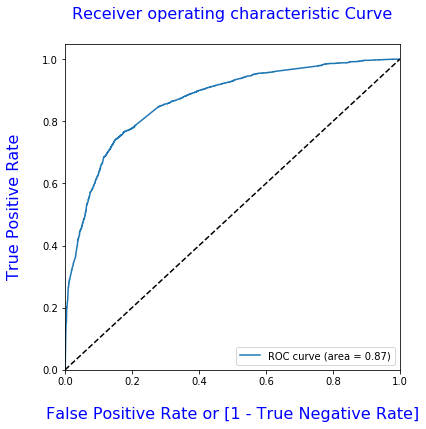

In [890]:
# Calling cutom function for plotting AUC-ROC Curve

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Inference: 

An **ROC curve demonstrates** below:

- It shows the tradeoff between `sensitivity and specificity` (any increase in sensitivity will be accompanied by a decrease in specificity)
- The closer the curve follows the `left-hand border and then the top border of the ROC space`, the more accurate the test.
- The closer the curve comes to the `45-degree diagonal of the ROC space`, the less accurate the test.
- The area under the `Curve or Gini is 0.87` which is represent a good model.

### Choosing the optimal Probability Cut off:

In [891]:
# Added new columns with y_train_predicted valus with different cut-offs

# create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

# Looping through each cut-off values
for i in numbers:
    
    # Added new columns with each cut-off values
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
    
# Display top 5 rows from final predicted dataframe
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_Id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.493596,1871,1,1,1,1,1,0,0,0,0,0
1,0,0.142528,6795,1,1,0,0,0,0,0,0,0,0
2,0,0.323444,3516,1,1,1,1,0,0,0,0,0,0
3,0,0.716628,8105,1,1,1,1,1,1,1,1,0,0
4,0,0.277508,3934,1,1,1,0,0,0,0,0,0,0


In [892]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    
    # Calculating confusion matrix,accuracy,sensi,speci 
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

# Display accuracy,sensi,speci with different prob cut-offs
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.520408  0.979724  0.237381
0.2   0.2  0.710111  0.901054  0.592454
0.3   0.3  0.794218  0.773723  0.806847
0.4   0.4  0.807823  0.730738  0.855322
0.5   0.5  0.804113  0.662206  0.891554
0.6   0.6  0.790507  0.585564  0.916792
0.7   0.7  0.772263  0.500811  0.939530
0.8   0.8  0.733302  0.339822  0.975762
0.9   0.9  0.713822  0.264801  0.990505


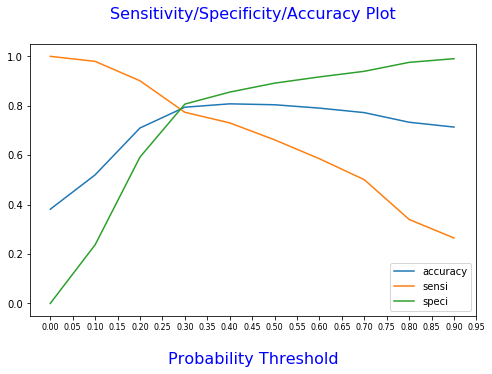

In [893]:
# Plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(8,5))

# Formatting the plot
plt.xlabel('Probability Threshold',fontsize = 16, color = 'blue', labelpad = 20)
plt.title('Sensitivity/Specificity/Accuracy Plot',fontsize = 16, color = 'blue', pad = 25)
plt.xticks(np.arange(0,1,step=0.05),size=8)

# Showing the plot using matplotlib.pyplot show() function
plt.show()

#### Inferences:

- From the above graph, **0.288** seems to be ideal cut-off points as the `Sensitivity/Specificity/Accuracy intersection point is 0.288 for a balanced model`.

#### Predicted Probability on Train dataset based on 0.288 as a probability threshold

In [894]:
# Calculating final_predicted value with optimul threshold value

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.288 else 0)

# Dropping [0.0 - 0.9] columns as these are not required any more
y_train_pred_final.drop(columns = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], inplace = True)

# Display top 5 rows of final predicted dataframe
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_Id,final_predicted
0,0,0.493596,1871,1
1,0,0.142528,6795,0
2,0,0.323444,3516,1
3,0,0.716628,8105,1
4,0,0.277508,3934,0


#### Accuracy score

In [895]:
# Checking the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7903525046382189

#### Inference:

- Accuracy of the train `model is 79%`.

### Building the confusion Matrix and other evaluation metrics

- **Accuracy** =  (TP + TN)/ (TP + TN + FP + FN)

- **Sensitivity** = TP/(TP + FN)

- **Specificity** =  TN/(TN + FP)

- **Precision** = TP/(TP + FP)

- **Recall** = TP/(TP + FN)

- **F1 Score** = 2 * Precision * Recall/(Precision + Recall)


- `TPR` (True Positive Rate) = TP/(TP + FN)
- `TNR` (True Negative Rate) = TN/(TN + FP)
- `FPR` (False Positive Rate) = FP/(TN + FP)
- `FNR` (False Negative Rate) = FN/(TP + FN)


#### Confusion Matrix

In [896]:
# Creating confusion matrix with final predicted values with optimul cut-offs

confusion_train = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_train

array([[3187,  815],
       [ 541, 1925]], dtype=int64)

In [897]:
# Custom function for checking logistic regression metrics

# Function Input: confusion_matrix
# Function Output: Returns Precision, Recall

def logictic_metrics(confusion_matrix):
    
    # calculate metrics from confision matrix
    TP = confusion_matrix[1,1] # true positive 
    TN = confusion_matrix[0,0] # true negatives
    FP = confusion_matrix[0,1] # false positives
    FN = confusion_matrix[1,0] # false negatives
    
    # Calculate Precision,Recall, Sensitivity,Specificity etc. 
    Precision=TP / float(TP+FP)
    Recall=TP / float(TP+FN)
    print('---------------------------------------------------------------')
    print('The Recall score of the model is \033[1m'+str(Recall)+'\033[0m')
    print('The Specificity score of the model is \033[1m '+str(TN / float(TN+FP))+'\033[0m')
    print('The Precision score of the model is \033[1m '+str(Precision)+'\033[0m')
    print('The False positive rate of the model is \033[1m '+str(FP/ float(TN+FP))+'\033[0m')
    print('The Negative predicted value of the model is \033[1m '+str(TN / float(TN+ FN))+'\033[0m')
    print('---------------------------------------------------------------')
    
    # Returns Precision, Recall scores
    return Precision,Recall

In [898]:
# Calling custom function for calculating and print different logistic regression metrics

Precision_train,Recall_train=logictic_metrics(confusion_train)

---------------------------------------------------------------
The Recall score of the model is 0.7806163828061639
The Specificity score of the model is  0.796351824087956
The Precision score of the model is  0.7025547445255474
The False positive rate of the model is  0.20364817591204398
The Negative predicted value of the model is  0.8548819742489271
---------------------------------------------------------------


#### Inference:

- The `Recall/Sensitivity` score of the model is **78.1%**.Out of actual Converted leads the model has predicted 78% Converted leads correctly.
- The `Specificity` score of the model is  **79.6%**.Out of actual non Converted leads the model has predicted 79.6% non Converted leads correctly.
- The `Precision` score of the model is  **70.3%**.Out of predicted Converted leads the model has predicted 70.3% Converted leads correctly.
- `Sensitivity/Recall` in this case indicates how many leads the model identify correctly out of all potential leads which are converting. Almost around 80% is what the CEO has requested in this case study. 

#### Calculate F1 Score

In [899]:
# Calculate F1 Score on train dataset

F1_score_train = 2*(Precision_train*Recall_train)/(Precision_train+Recall_train)
F1_score_train

0.739531310026892

#### F1 Score

- The F1 score for the model for train `dataset is 74%`.If we give equal importance to` Precision and Recall` , then we calcualte F1 score and see the model `F1 score is 74%.`

### Precision - Recall Trade off:

Next we will look into `Precision- Recall trade off` to see if balancing these values provides better output.

- `Precision` means out of all leads which are predicted at 1, how many have truly converted.

- `Recall` means out of all leads that have converted, how many of them were correctly identifies as 1. This is the same value as `sensitivity`.

Precision-Recall trade-off point is used to decide the cut-off point especially when there is huge imbalance in data. In our case the `data distribution is 61.46% vs 38.54%`. So imbalance of data is not a big factor.

In [900]:
# Custom function for plotting Precision recall curve

# Function Input: Precision and Recall 
# Function Output: Returns None

def draw_precision_recall_curve(p,r):
    
    # Plotting precision_recall_curve
    plt.plot(thresholds, p[:-1], "g-")
    plt.plot(thresholds, r[:-1], "r-")
    
    # Formatting the precision_recall_curve
    plt.xlabel('Thresholds',fontsize = 16, color = 'blue', labelpad = 20)
    plt.title('Precision Recall Curve',fontsize = 16, color = 'blue', pad = 25)
    
    # Showing the plot using matplotlib.pyplot show() function
    plt.show()

In [901]:
# Calling delivered method for calcuate p, r, threshold values of precision_recall_curve plot

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted
                                          , y_train_pred_final.Converted_Prob)

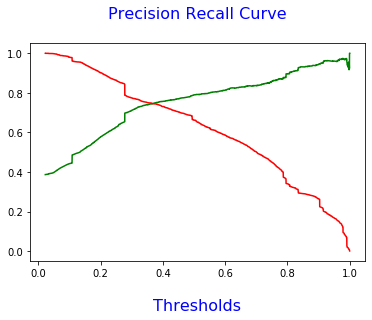

In [902]:
# Custom function for plotting precision_recall_curve

draw_precision_recall_curve(p,r)

#### Inferences:

- Based on Precision- Recall Trade off curve, the `cutoff point seems to 0.37`.
- From the precision-recall graph above, we get the optical threshold value as `close to 0.37`. However our business requirement here is to have Lead Conversion Rate around 80%.`This is already achieved with our earlier threshold value of 0.288`. So we will stick to this value.

#### Predicted Probability on Train dataset based on 0.37 as a probability threshold Precision recall curve

In [903]:
# Predicting y_train_predicted value based on cut-off value founf from precision_recall_curve plot

y_train_pred_final['final_predicted2'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)

# Displaying the top 5 rows of y_train_pred_final dataframe
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_Id,final_predicted,final_predicted2
0,0,0.493596,1871,1,1
1,0,0.142528,6795,0,0
2,0,0.323444,3516,1,0
3,0,0.716628,8105,1,1
4,0,0.277508,3934,0,0


#### Calculating the Recall score

In [904]:
# Calculating Recall score based on final_predicted2 calculated from optimul cutoff found from Precision recall curve

Recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted2)

# Printing the Recall score
print(Recall)

0.7445255474452555


#### Inference:

- The Recall score is 74%

#### Calculating the Precision score

In [905]:
# Calculating Precision score based on final_predicted2 calculated from optimul cutoff found from Precision recall curve

Precision = precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted2)

# Printing the Recall score
print(Precision)

0.7466449776331843


#### Inference:

- The precision score is 75%

#### Calculating the F1 score

In [906]:
# Calculating F1 Score based on Precision & Recall calculated from optimul cutoff found from Precision recall curve

F1_score_train = 2*(Precision*Recall)/(Precision+Recall)
F1_score_train

0.7455837563451777

#### Inference:

- The F1 score is 75%

#### Inference:

- **We will stick to cut off from auc-roc curve which is 0.288** for model prediction on Test dataset

### Model prediction and evalution : Test Dataset

#### Scaling the test dataset based on train set

In [907]:
# Perform scalling on test dataset independent variables

# Listing variables to be scalled
col_scale_test = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Performing transform with the scaler object fitted on train dataset
X_test[col_scale] = scaler.transform(X_test[col_scale_test])

# Displaying top 5 rows from X test dataset
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Referral Sites,Lead Source_Welingak Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4269,0,1.749143,1.013928,2.117849,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2376,0,-1.149699,-0.901052,-1.266675,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7766,0,0.662077,-0.789297,1.553761,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9199,0,-1.149699,-0.901052,-1.266675,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4359,0,-1.149699,-0.901052,-1.266675,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [908]:
# Feature selection from test dataset based on RFE and manual features selected from train set

X_test = X_test[rfe_cols]

# Displaying top 5 rows from X test dataset with selected features
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Welingak Website,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Specialization_Hospitality Management,Specialization_Others
4269,0,1.013928,0,0,0,0,0,0,0,0,0,1
2376,0,-0.901052,0,1,0,0,0,0,1,0,0,1
7766,0,-0.789297,0,0,1,0,0,0,0,1,0,0
9199,0,-0.901052,0,0,0,1,0,0,1,0,0,1
4359,0,-0.901052,0,1,0,0,0,0,1,0,0,0


#### Predicting the probability values on Test dataset

In [909]:
# Perform prediction on test dataset

# Add Beta0 constant on independent test dataset
X_test_sm = sm.add_constant(X_test)

# Predicting output based on logistic model created with train dataset
y_test_pred = lr_model1.predict(X_test_sm)

# reshaping to convert into an array
y_test_pred = y_test_pred.values.reshape(-1)

# Displaying top 10 values from predicted value array
y_test_pred[:10]

array([0.24654415, 0.786261  , 0.83972991, 0.2775081 , 0.90324148,
       0.41380719, 0.61768541, 0.22387729, 0.11376877, 0.21728863])

In [910]:
# Created new dataframe to display predicted probability and predicted values

# Dataframe created with y_test_true, y_test_probability values
y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Prob':y_test_pred})

# Resetting index
y_test_pred_final.reset_index(inplace=True,drop=True)

# Adding new column with unique identified
y_test_pred_final['Prospect_Id'] = y_test.index

# Displaying top 10 rows of new predicted dataframe
y_test_pred_final.head()

,Converted,Converted_Prob,Prospect_Id
0,1,0.246544,4269
1,1,0.786261,2376
2,1,0.839730,7766
3,0,0.277508,9199
4,1,0.903241,4359


#### Predicting the Converted values on Test dataset by taking the threshold of 0.288

In [911]:
# Calculating final predicted value (Hot or Cold lead) with threshold value decided from train dataset (AUC-ROC curve)

y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.288 else 0)

In [912]:
# Displaying top 10 rows of new predicted dataframe with final prediction column

y_test_pred_final.head()

,Converted,Converted_Prob,Prospect_Id,final_predicted
0,1,0.246544,4269,0
1,1,0.786261,2376,1
2,1,0.839730,7766,1
3,0,0.277508,9199,0
4,1,0.903241,4359,1


#### Building the confusion Matrix and other evaluation metrics on test dataset


- **Accuracy** =  (TP + TN)/ (TP + TN + FP + FN)

- **Sensitivity** = TP/(TP + FN)

- **Specificity** =  TN/(TN + FP)

- **Precision** = TP/(TP + FP)

- **Recall** = TP/(TP + FN)

- **F1 Score** = 2 * Precision * Recall/(Precision + Recall)

#### Accuracy score

In [913]:
# Check the overall accuracy on test dataset

metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.7839105339105339

#### Inference:

- Accuracy of the test `model is 78%`.

#### Build Confusion Matrix

In [914]:
# Calculating confusion matrix on test dataset

confusion_test = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted)
confusion_test

array([[1317,  360],
       [ 239,  856]], dtype=int64)

In [915]:
# Calling custom function to display different metrics of logistic regression model

# Precision
# Recall
# Specificity 
# False positive rate
# Negative predicted value

Precision_test,Recall_test=logictic_metrics(confusion_test)

---------------------------------------------------------------
The Recall score of the model is 0.7817351598173516
The Specificity score of the model is  0.7853309481216458
The Precision score of the model is  0.7039473684210527
The False positive rate of the model is  0.2146690518783542
The Negative predicted value of the model is  0.846401028277635
---------------------------------------------------------------


#### Inference:

- The `Recall/Sensitivity` score of the model is **78.1%**.Out of actual Converted leads the model has predicted 78% Converted leads correctly.
- The `Specificity` score of the model is  **79%**.Out of actual non Converted leads the model has predicted 79.6% non Converted leads correctly.
- The `Precision` score of the model is  **70.4%**.Out of predicted Converted leads the model has predicted 70.4% Converted leads correctly.
- `Sensitivity/Recall` in this case indicates how many leads the model identify correctly out of all potential leads which are converting. Almost around 80% is what the CEO has requested in this case study.

**The Sensitivity/Recall value on Test data is 78.2% vs 78.1% in Train data. The accuracy values is 78%. It shows that model is performing well in test data set also and is not over-trained.**

In [916]:
# Calculating F1 Score on the test dataset predicted values

F1_score_test = 2*(Precision_test*Recall_test)/(Precision_test+Recall_test)
F1_score_test

0.7408048463868455

#### F1 Score

- The F1 score for the model for test `dataset is 74%`.If we give equal importance to` Precision and Recall` , then we calcualte F1 score and see the model `F1 score is 74%.`

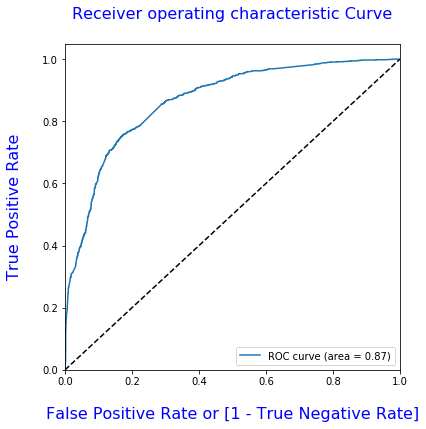

In [917]:
# Calling custom function for plotting auc-roc curve on test dataset

draw_roc(y_test_pred_final.Converted, y_test_pred_final.Converted_Prob)

#### Inference: 

An **ROC curve demonstrates based on Test dataset** below:

- It shows the tradeoff between `sensitivity and specificity` (any increase in sensitivity will be accompanied by a decrease in specificity)
- The closer the curve follows the `left-hand border and then the top border of the ROC space`, the more accurate the test.
- The closer the curve comes to the `45-degree diagonal of the ROC space`, the less accurate the test.
- The area under the `Curve or Gini is 0.87` which is represent a good model.

### Calculating Lead score for the test dataset 

- Lead Score = 100 * Conversion Probability

In [918]:
# Lead score generation and display

# Creating new column for displaying lead score value (0 - 100) based on conversion probability
y_test_pred_final['Lead_score']=(y_test_pred_final['Converted_Prob']*100).astype("int")

# Reordering the columns 
y_test_pred_final=y_test_pred_final[['Prospect_Id','Converted','Converted_Prob','final_predicted','Lead_score']]

# Displaying the top 10 rows of dataframe (descending order) with top 10 lead score value
y_test_pred_final.sort_values(by='Converted_Prob',ascending=False).head(10)

,Prospect_Id,Converted,Converted_Prob,final_predicted,Lead_score
546,3478,1,0.999614,1,99
2405,5921,1,0.999443,1,99
224,8120,1,0.999311,1,99
835,4613,1,0.999085,1,99
745,6383,1,0.999020,1,99
1091,818,1,0.999020,1,99
2589,7327,1,0.998810,1,99
2150,133,1,0.998732,1,99
605,7187,1,0.998601,1,99
1242,8107,1,0.998496,1,99


#### Inferences:

- We can use the `lead_score` column to identify which potential leads to prioritize first. `The higher` the score, the higher chances are there for the lead to convert. If there are `limited sales representatives`, then `score cut-off should be higher to ensure a higher conversion probability people are contacted further` to turn them into a potential customer. It is the same as increasing the `Precision value of the model` by adjusting the cut-off point to a higher value. 

- In case there are `more resources available` in the sales team (i.e., interns, etc. ), then `the score cut-off can be lowered`. It is the same as increasing the `Recall/Sensitivity value of the model` by adjusting the cut-off point to a Lower value. 

### Determining Feature Importance

#### Selecting the coefficients of the selected features from our final model excluding the intercept

In [919]:
# Displaying Beta- coefficient found from final logistic regression model

# Formatting the model coefficients value with 2 decimal places
final_parameters = round(lr_model1.params[1:],2)

# Displaying the model coefficients
print(final_parameters)

Do Not Email                            -1.28
Total Time Spent on Website              1.09
Lead Origin_Landing Page Submission     -0.75
Lead Origin_Lead Add Form                3.36
Lead Source_Google                       0.26
Lead Source_Olark Chat                   1.10
Lead Source_Welingak Website             2.50
Occupation_Student                       1.05
Occupation_Unemployed                    1.15
Occupation_Working Professional          3.55
Specialization_Hospitality Management   -0.93
Specialization_Others                   -0.93
dtype: float64


#### Getting a relative coefficient value for all the features with respect to the feature's with the highest coefficient

In [920]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

# Storing the model parameters into a variable to display it's relative weightage
top_predictors = final_parameters

# Calculating relative importance of each features by dividing individual coefficient with max beta value
top_predictors = 100.0 * (top_predictors / top_predictors.max())

# Print the relative importance coefficients value wrt each features
print(round(top_predictors,2))

Do Not Email                             -36.06
Total Time Spent on Website               30.70
Lead Origin_Landing Page Submission      -21.13
Lead Origin_Lead Add Form                 94.65
Lead Source_Google                         7.32
Lead Source_Olark Chat                    30.99
Lead Source_Welingak Website              70.42
Occupation_Student                        29.58
Occupation_Unemployed                     32.39
Occupation_Working Professional          100.00
Specialization_Hospitality Management    -26.20
Specialization_Others                    -26.20
dtype: float64


#### Plot showing the features variables based on their relative coefficient values

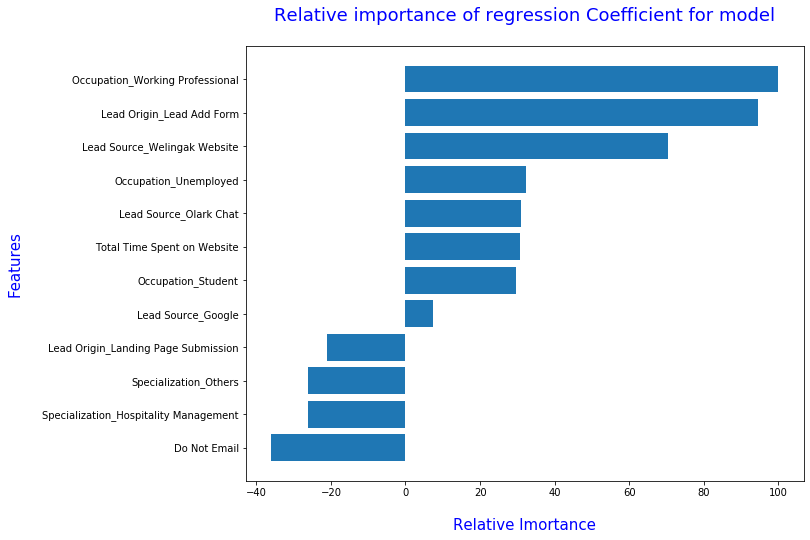

In [921]:
# Visualizing the Relative importance of regression Coefficient for model

# Creating dataframe with top predictors
top_predictors=pd.DataFrame(top_predictors)

# Setting column names
top_predictors.columns=['Relative Imortance']

# Sort dataframe by column 'Relative Imortance' in ascending order
top_predictors.sort_values(by='Relative Imortance',ascending=True,inplace=True)

# Setting figure size
plt.figure(figsize=(10,8))

# Setting x- axis and y-axis labels
plt.xlabel('Relative Imortance',fontsize=15,color='blue',labelpad=20)
plt.ylabel('Features',fontsize=15,color='blue',labelpad=20)

# Setting title
plt.title('Relative importance of regression Coefficient for model',color='blue',fontsize=18,pad=25)

# Plotting horizontal bar to display weightage of features
plt.barh(top_predictors.index,top_predictors['Relative Imortance'])

# Displaying the plot using matplotlib.pyplot show() function
plt.show()

### Final Features list based on its importance:

- It was found that the below variables/Features mattered the most based on which the leads are most likely to convert into paying customers (**In descending order**):


    - Occupation_Working Professional
    - Lead Origin_Lead Add Form
    - Lead Source_Welingak Website
    - Occupation_Unemployed
    - Lead Source_Olark Chat
    - Total Time Spent on Website
    - Occupation_Student
    - Lead Source_Google
    - Lead Origin_Landing Page Submission
    - Specialization_Others
    - Specialization_Hospitality Management
    - Do Not Email

# Model Summary:


Interpretation `Logistic regression model` with multiple predictor variables

In general, we can have `multiple predictor variables` in a logistic regression model as below:

**logit(p) = log(p/(1-p))= β0 + β1* X1 + … + βn * Xn**

- Applying such a model to our example dataset, each estimated coefficient is the expected change in the log odds of being a potential lead for a unit increase in the corresponding predictor variable holding the other predictor variables constant at a certain value. 

- Each exponentiated coefficient is the ratio of two odds, or the change in odds in the multiplicative scale for a unit increase in the corresponding predictor variable holding other variables at a certain value.

**The magnitude and sign of the coefficients loaded in the logit function:**

**logit(p) = log(p/(1-p))** = (3.36 * Lead Origin_Lead Add Form) + (3.55 * Occupation_Working Professional) + (2.50 * Lead Source_Welingak Website) + (1.15 * Occupation_Unemployed) + (1.10 * Lead Source_Olark Chat) + (1.09 * Total Time Spent on Website) + (1.05 * Occupation_Student) + (0.26 * Lead Source_Google) - (0.75 * Lead Origin_Landing Page Submission) - (0.93 * Specialization_Hospitality Management) -(0.93 * Specialization_Others) - (1.28 * Do Not Email) - 1.29

### Point to remember:

- Another point to note here is that, depending on the `business requirement`, we can increase or decrease the probability threshold value with in turn will decrease or increase the `Sensitivity and increase or decrease the Specificity of the model`.

- `High Sensitivity will ensure that almost all leads who are likely to Convert are correctly predicted` where as `high Specificity` will ensure that leads that are on the brink of the probability of getting Converted or model predicted as not converted properly when compare to actual not converted leads.`